<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_901-950.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1395]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1396]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

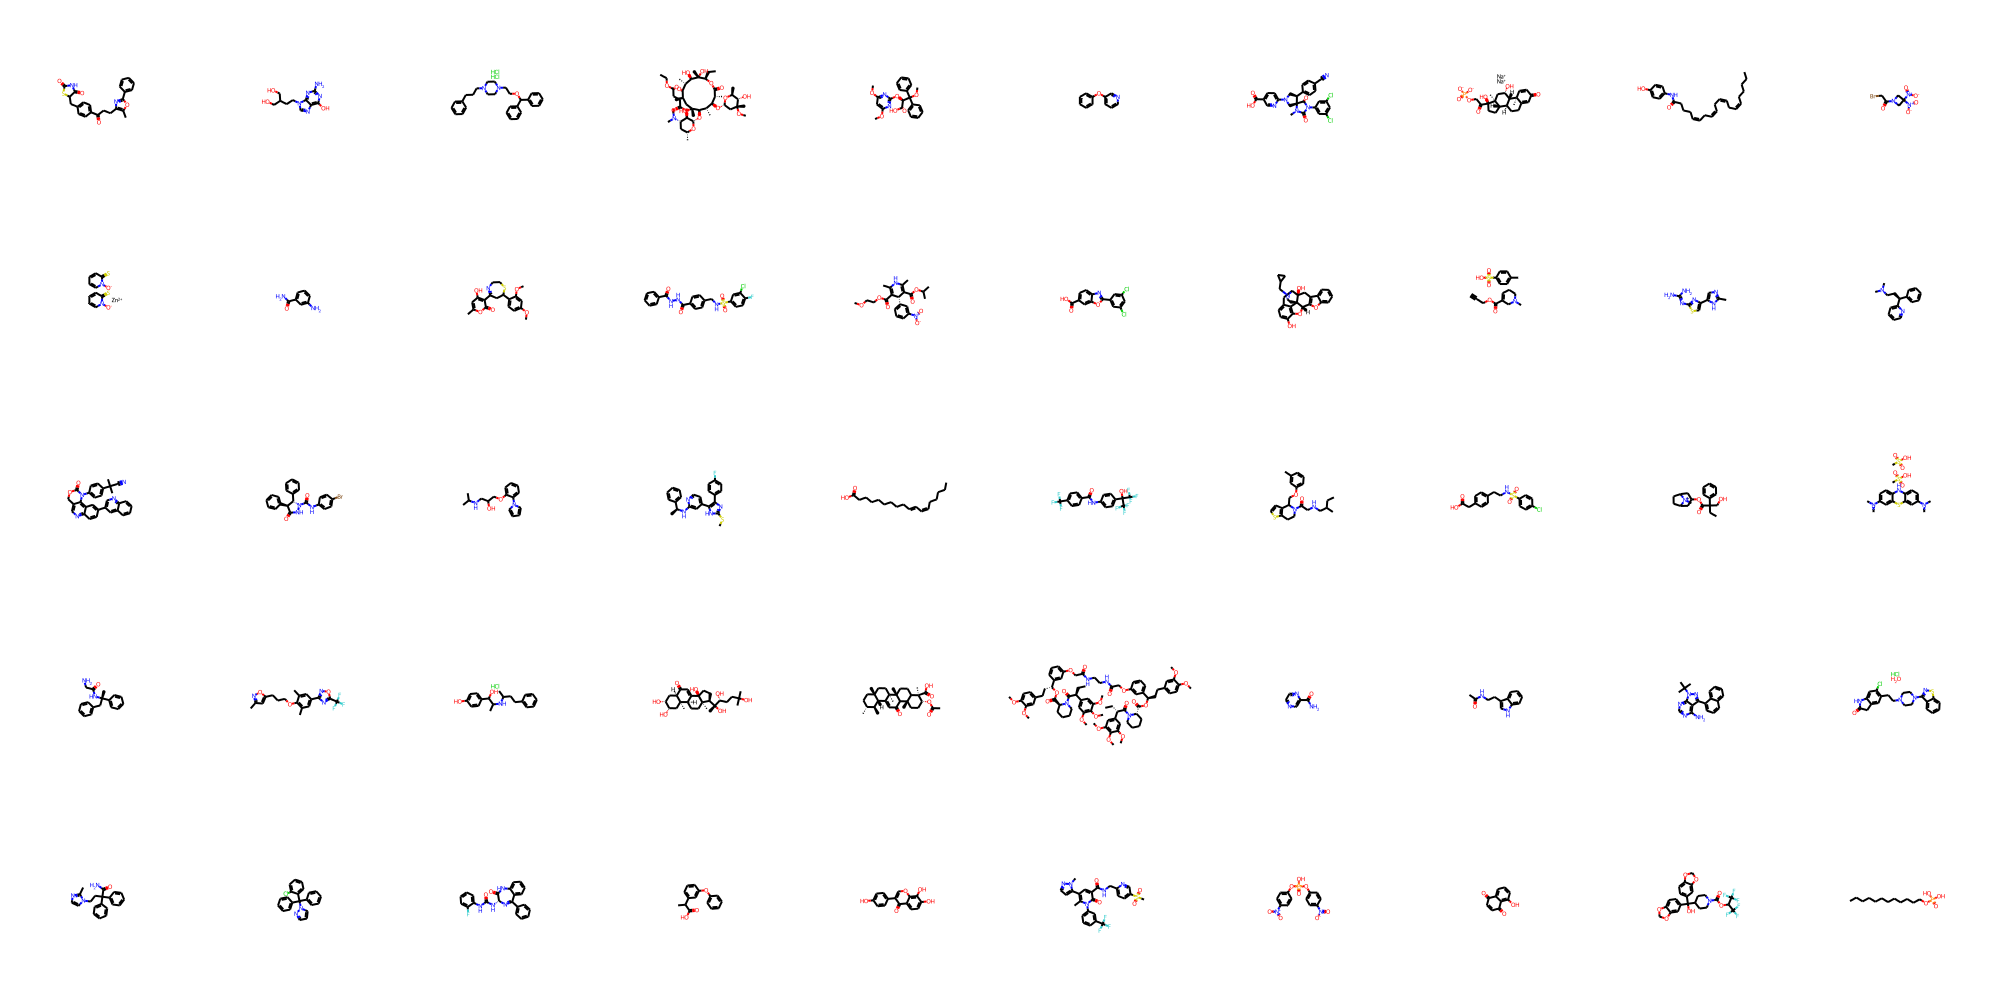

In [1397]:
smiles_list = [

'Cc1oc(-c2ccccc2)nc1CCC(=O)c1ccc(CC2SC(=O)NC2=O)cc1',
'Nc1nc(O)c2ncn(CCC(CO)CO)c2n1',
'Cl.Cl.c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1',
'CCOC(=O)CCC(=O)O[C@H]1[C@H](O[C@@H]2[C@@H](C)[C@H](O[C@H]3C[C@@](C)(OC)[C@@H](O)[C@H](C)O3)[C@@H](C)C(=O)O[C@H](CC)[C@@](C)(O)[C@H](O)[C@@H](C)C(=O)[C@H](C)C[C@@]2(C)O)O[C@H](C)C[C@@H]1N(C)C',
'COc1cc(OC)nc(O[C@H](C(=O)O)C(OC)(c2ccccc2)c2ccccc2)n1',
'c1ccc(Oc2cccnc2)cc1',
'CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1ccc(C(=O)O)cn1)C[C@H]2c1ccc(C#N)cc1',
'C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]43C)[C@@H]1CC[C@]2(O)C(=O)COP(=O)([O-])[O-].[Na+].[Na+]',
'CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)Nc1ccc(O)cc1',
'O=C(CBr)N1CC([N+](=O)[O-])([N+](=O)[O-])C1',
'[O-]n1ccccc1=S.[O-]n1ccccc1=S.[Zn+2]',
'NC(=O)c1cccc(N)c1',
'COc1ccc(C2CC(c3c(O)cc(C)oc3=O)=NCCS2)c(OC)c1',
'O=C(NNC(=O)c1ccc(CNS(=O)(=O)c2ccc(F)c(Cl)c2)cc1)c1ccccc1',
'COCCOC(=O)C1=C(C)NC(C)=C(C(=O)OC(C)C)[C@@H]1c1cccc([N+](=O)[O-])c1',
'O=C(O)c1ccc2nc(-c3cc(Cl)cc(Cl)c3)oc2c1',
'Oc1ccc2c3c1O[C@H]1c4oc5ccccc5c4C[C@@]4(O)C(C2)N(CC2CC2)CC[C@]314',
'C#CCOC(=O)C1=CCCN(C)C1.Cc1ccc(S(=O)(=O)O)cc1',
'Cc1ncc(-c2csc(N=C(N)N)n2)[nH]1',
'CN(C)CC[C@@H](c1ccccc1)c1ccccn1',
'CC(C)(C#N)c1ccc(N2C(=O)OCc3cnc4ccc(-c5cnc6ccccc6c5)cc4c32)cc1',
'O=C1NN(C(=O)Nc2ccc(Br)cc2)[C@@H](c2ccccc2)[C@@H]1c1ccccc1',
'CC(C)NCC(O)COc1ccccc1-n1cccc1',
'CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(N[C@@H](C)c3ccccc3)c2)[nH]1',
'CCCCC/C=C\C=C\CCCCCCCCC(=O)O',
'O=C(Nc1ccc(C(O)(C(F)(F)F)C(F)(F)F)cc1)c1ccc(C(F)(F)F)cc1',
'CCC(C)CNCC(=O)N1CCc2sccc2C1COc1cccc(C)c1',
'O=C(O)Cc1ccc(CCNS(=O)(=O)c2ccc(Cl)cc2)cc1',
'CCC(CO)(C(=O)OC1CC2CCC(C1)[N+]2(C)C)c1ccccc1',
'CN(C)c1ccc2c(c1)Sc1cc(N(C)C)ccc1N2.CS(=O)(=O)O.CS(=O)(=O)O',
'C[C@@](Cc1ccccc1)(NC(=O)CN)c1ccccc1',
'Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1',
'CC(CCc1ccccc1)NC(C)C(O)c1ccc(O)cc1.Cl',
'CC(C)(O)CC[C@@H](O)[C@](C)(O)[C@@H]1CC[C@@]2(O)C3=CC(=O)[C@@H]4C[C@@H](O)[C@@H](O)C[C@]4(C)[C@@H]3CC[C@]12C',
'CC(=O)O[C@@H]1CC[C@@]2(C)C(CC[C@]3(C)C2C(=O)C=C2[C@@H]4[C@@H](C)[C@H](C)CC[C@]4(C)CC[C@]23C)[C@@]1(C)C(=O)O',
'CC[C@H](C(=O)N1CCCC[C@H]1C(=O)O[C@H](CCc1ccc(OC)c(OC)c1)c1cccc(OCC(=O)NCCNC(=O)COc2cccc([C@@H](CCc3ccc(OC)c(OC)c3)OC(=O)[C@@H]3CCCCN3C(=O)[C@@H](CC)c3cc(OC)c(OC)c(OC)c3)c2)c1)c1cc(OC)c(OC)c(OC)c1',
'NC(=O)c1cnccn1',
'CC(=O)NCCc1c[nH]c2ccccc12',
'CC(C)(C)n1nc(-c2cccc3ccccc23)c2c(N)ncnc21',
'Cl.O.O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1',
'Cc1nccn1CCC(C(N)=O)(c1ccccc1)c1ccccc1',
'Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1cccn1',
'O=C(Nc1ccccc1F)N[C@H]1N=C(c2ccccc2)c2ccccc2NC1=O',
'CC(C(=O)O)c1cccc(Oc2ccccc2)c1',
'O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12',
'Cc1c(-c2ccnn2C)cc(C(=O)NCc2ccc(S(C)(=O)=O)cn2)c(=O)n1-c1cccc(C(F)(F)F)c1',
'O=[N+]([O-])c1ccc(OP(=O)(O)Oc2ccc([N+](=O)[O-])cc2)cc1',
'O=C1C=CC(=O)c2c(O)cccc21',
'O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(C(O)(c2ccc3c(c2)OCO3)c2ccc3c(c2)OCO3)CC1',
'CCCCCCCCCCCCOP(=O)(O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



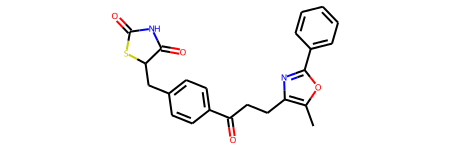

In [1398]:
M1 = mol_list [0]
M1

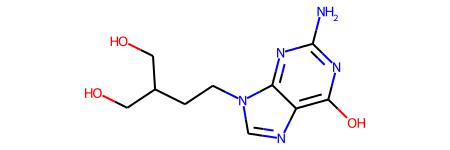

In [1399]:
M2 = mol_list [1]
M2

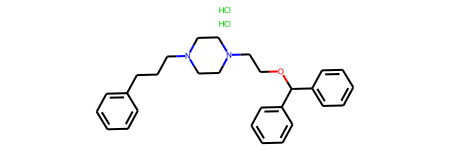

In [1400]:
M3 = mol_list [2]
M3

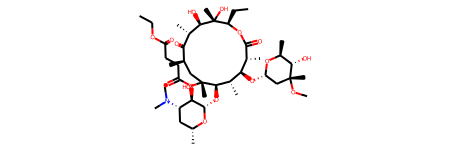

In [1401]:
M4 = mol_list [3]
M4

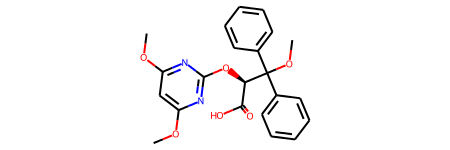

In [1402]:
M5 = mol_list [4]
M5

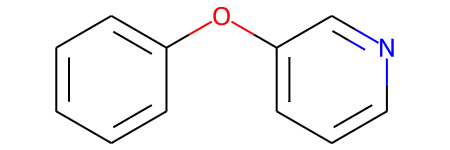

In [1403]:
M6 = mol_list [5]
M6

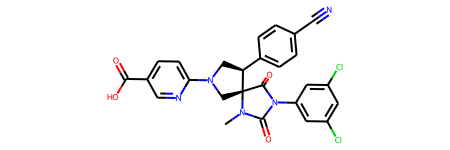

In [1404]:
M7 = mol_list [6]
M7

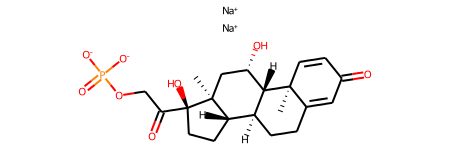

In [1405]:
M8 = mol_list [7]
M8

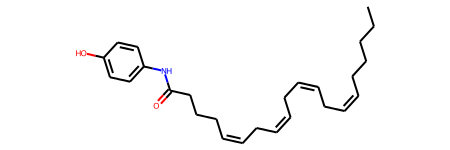

In [1406]:
M9 = mol_list [8]
M9

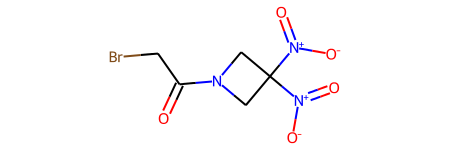

In [1407]:
M10 = mol_list [9]
M10

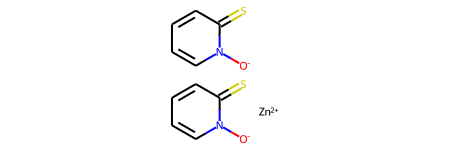

In [1408]:
M11 = mol_list [10]
M11

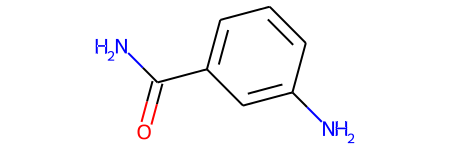

In [1409]:
M12 = mol_list [11]
M12

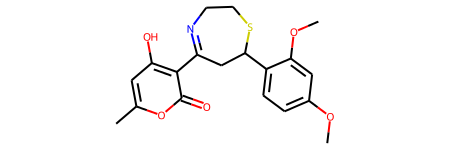

In [1410]:
M13 = mol_list [12]
M13

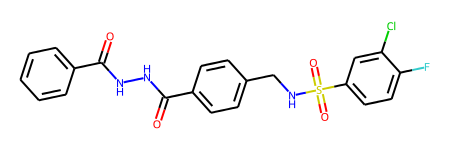

In [1411]:
M14 = mol_list [13]
M14

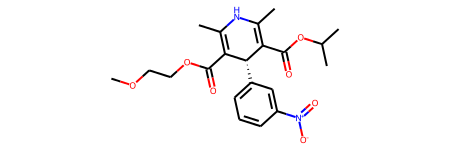

In [1412]:
M15 = mol_list [14]
M15

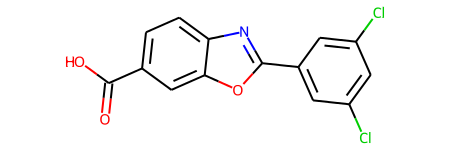

In [1413]:
M16 = mol_list [15]
M16

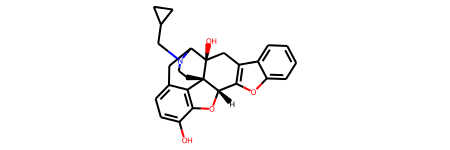

In [1414]:
M17 = mol_list [16]
M17

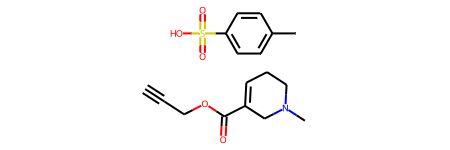

In [1415]:
M18 = mol_list [17]
M18

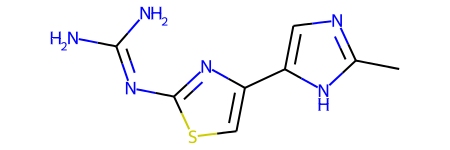

In [1416]:
M19 = mol_list [18]
M19

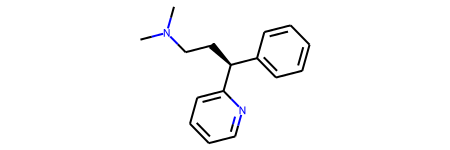

In [1417]:
M20 = mol_list [19]
M20

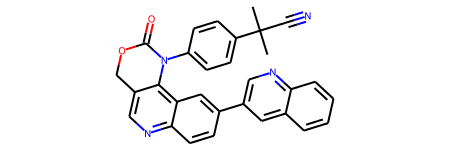

In [1418]:
M21 = mol_list [20]
M21

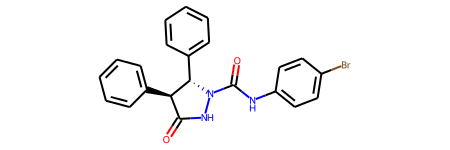

In [1419]:
M22 = mol_list [21]
M22

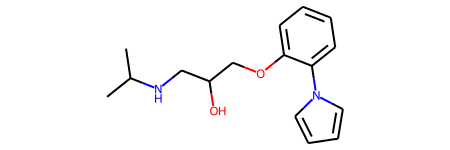

In [1420]:
M23 = mol_list [22]
M23

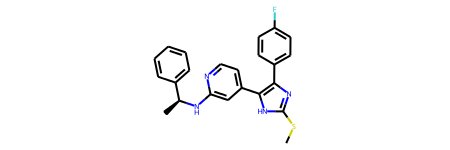

In [1421]:
M24 = mol_list [23]
M24

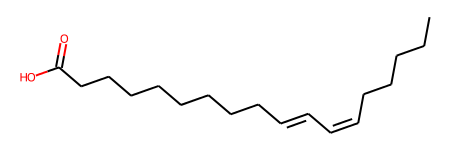

In [1422]:
M25 = mol_list [24]
M25

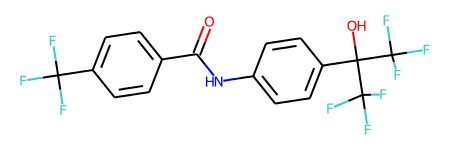

In [1423]:
M26 = mol_list [25]
M26

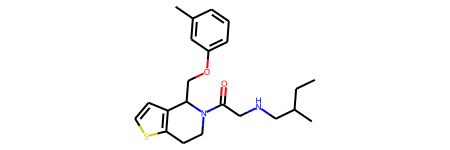

In [1424]:
M27 = mol_list [26]
M27

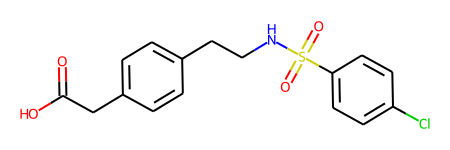

In [1425]:
M28 = mol_list [27]
M28

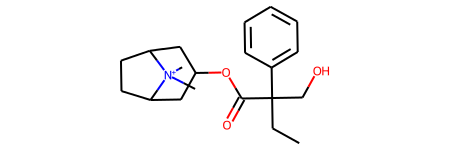

In [1426]:
M29 = mol_list [28]
M29

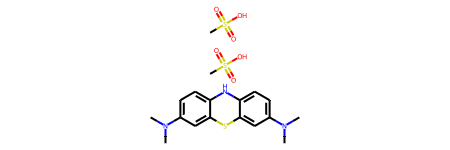

In [1427]:
M30 = mol_list [29]
M30

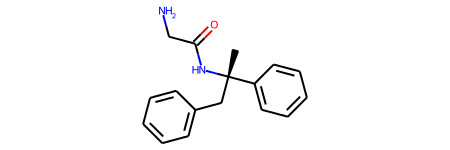

In [1428]:
M31 = mol_list [30]
M31

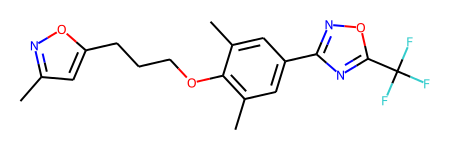

In [1429]:
M32 = mol_list [31]
M32

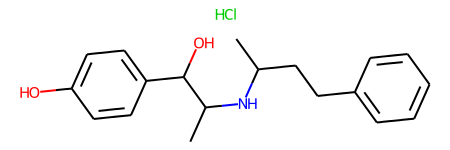

In [1430]:
M33 = mol_list [32]
M33

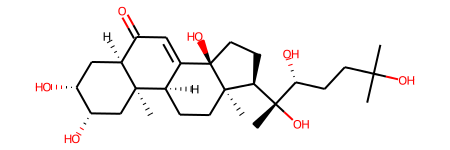

In [1431]:
M34 = mol_list [33]
M34

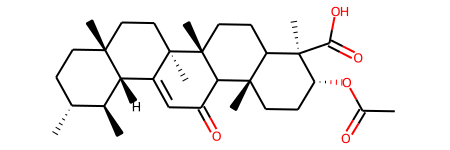

In [1432]:
M35 = mol_list [34]
M35

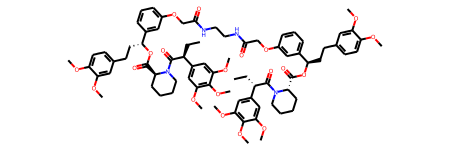

In [1433]:
M36 = mol_list [35]
M36

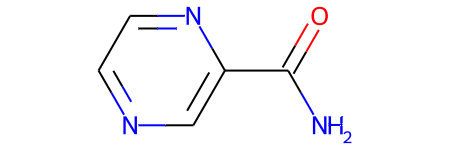

In [1434]:
M37= mol_list [36]
M37

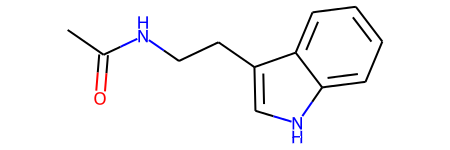

In [1435]:
M38= mol_list [37]
M38

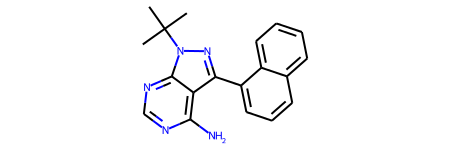

In [1436]:
M39= mol_list [38]
M39

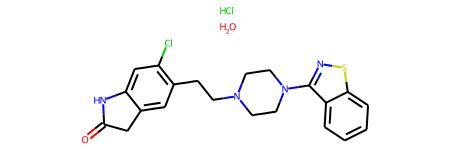

In [1437]:
M40= mol_list [39]
M40

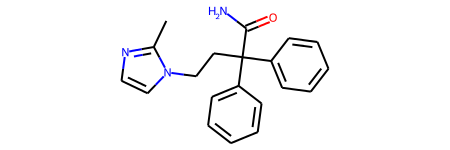

In [1438]:
M41= mol_list [40]
M41

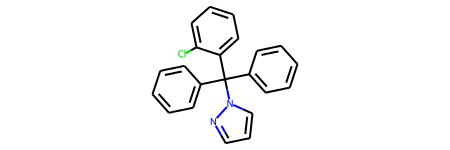

In [1439]:
M42= mol_list [41]
M42

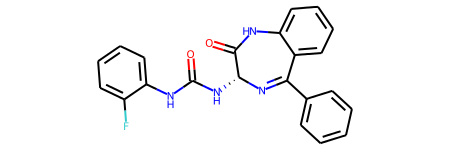

In [1440]:
M43= mol_list [42]
M43

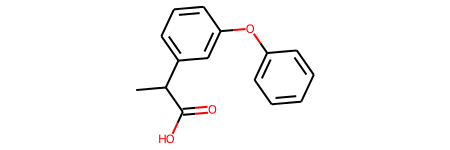

In [1441]:
M44= mol_list [43]
M44

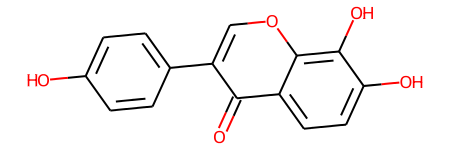

In [1442]:
M45= mol_list [44]
M45

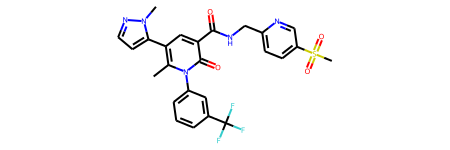

In [1443]:
M46= mol_list [45]
M46

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


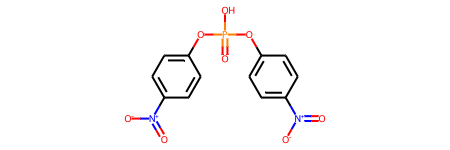

In [1444]:
M47= mol_list [46]
M47

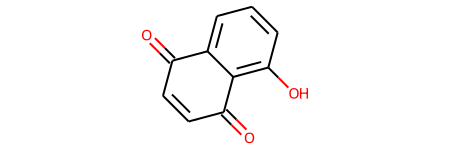

In [1445]:
M48= mol_list [47]
M48

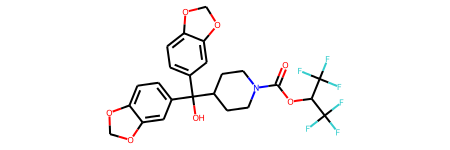

In [1446]:
M49= mol_list [48]
M49

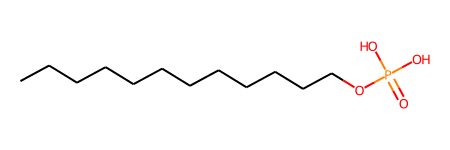

In [1447]:
M50= mol_list [49]
M50

In [1448]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[10,
 23,
 33,
 36,
 64,
 80,
 90,
 136,
 155,
 163,
 175,
 219,
 237,
 252,
 310,
 314,
 356,
 360,
 361,
 378,
 384,
 389,
 419,
 424,
 427,
 432,
 458,
 540,
 580,
 594,
 620,
 650,
 656,
 669,
 673,
 675,
 698,
 720,
 726,
 730,
 733,
 736,
 777,
 781,
 807,
 816,
 831,
 835,
 849,
 873,
 893,
 894,
 987,
 1019]

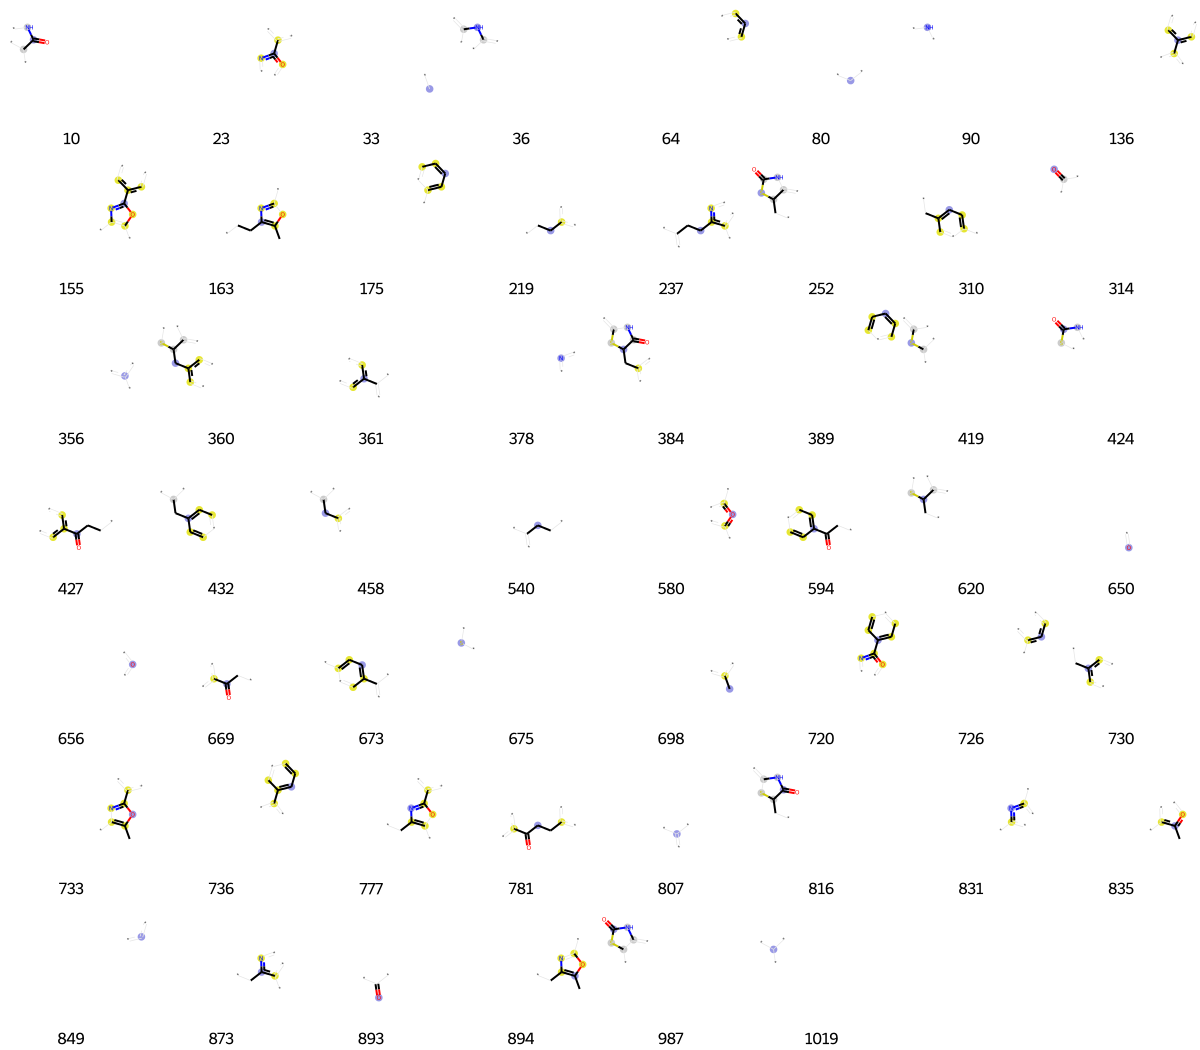

In [1449]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1450]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 16,
 71,
 80,
 106,
 121,
 147,
 150,
 216,
 222,
 289,
 351,
 356,
 378,
 396,
 409,
 428,
 431,
 433,
 475,
 482,
 578,
 633,
 672,
 700,
 739,
 772,
 807,
 816,
 830,
 831,
 849,
 867,
 932,
 935,
 1000]

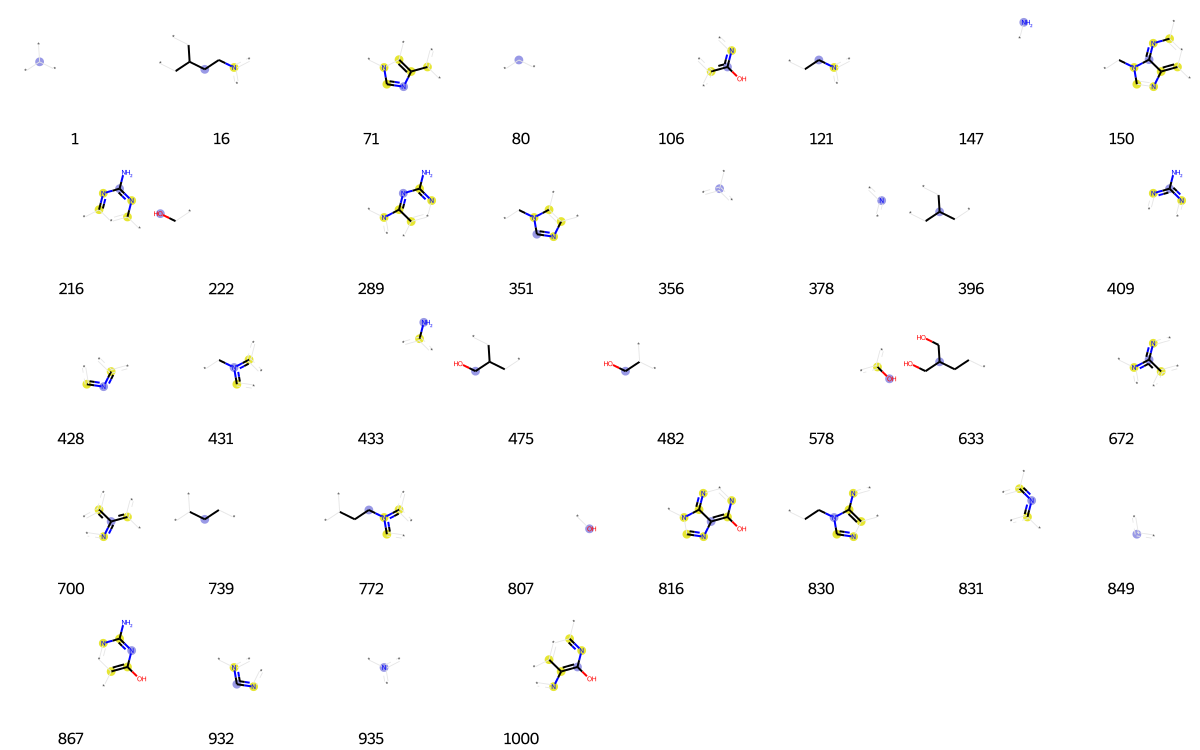

In [1451]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1452]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 74,
 80,
 121,
 175,
 219,
 302,
 316,
 341,
 356,
 389,
 430,
 456,
 458,
 514,
 533,
 557,
 653,
 695,
 726,
 730,
 741,
 767,
 819,
 849,
 887,
 908,
 926,
 935,
 978]

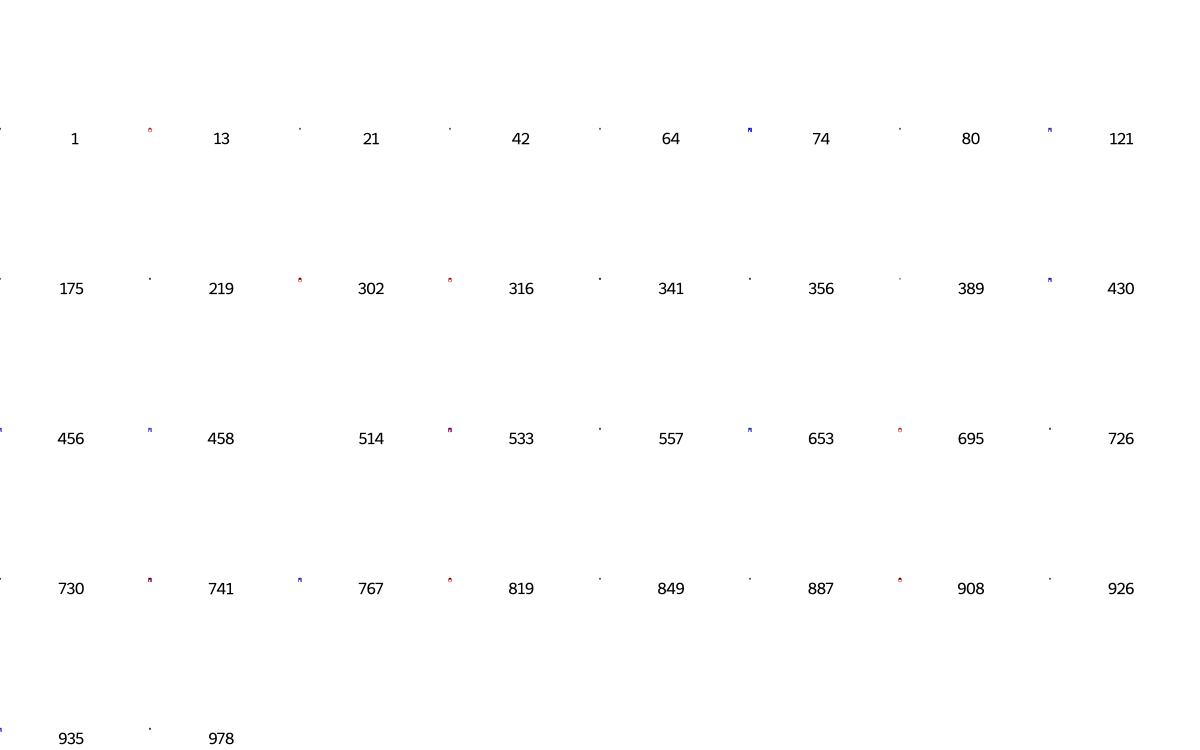

In [1453]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1454]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[30,
 33,
 36,
 42,
 80,
 102,
 129,
 130,
 138,
 139,
 140,
 147,
 149,
 152,
 193,
 206,
 214,
 231,
 233,
 242,
 248,
 250,
 251,
 268,
 269,
 278,
 279,
 285,
 289,
 294,
 299,
 314,
 317,
 342,
 349,
 356,
 357,
 362,
 371,
 399,
 403,
 426,
 430,
 438,
 457,
 473,
 485,
 522,
 540,
 560,
 605,
 611,
 612,
 644,
 649,
 650,
 655,
 656,
 669,
 677,
 679,
 682,
 687,
 695,
 698,
 722,
 739,
 750,
 755,
 764,
 807,
 841,
 861,
 881,
 886,
 893,
 897,
 908,
 926,
 941,
 960,
 967,
 1009,
 1019]

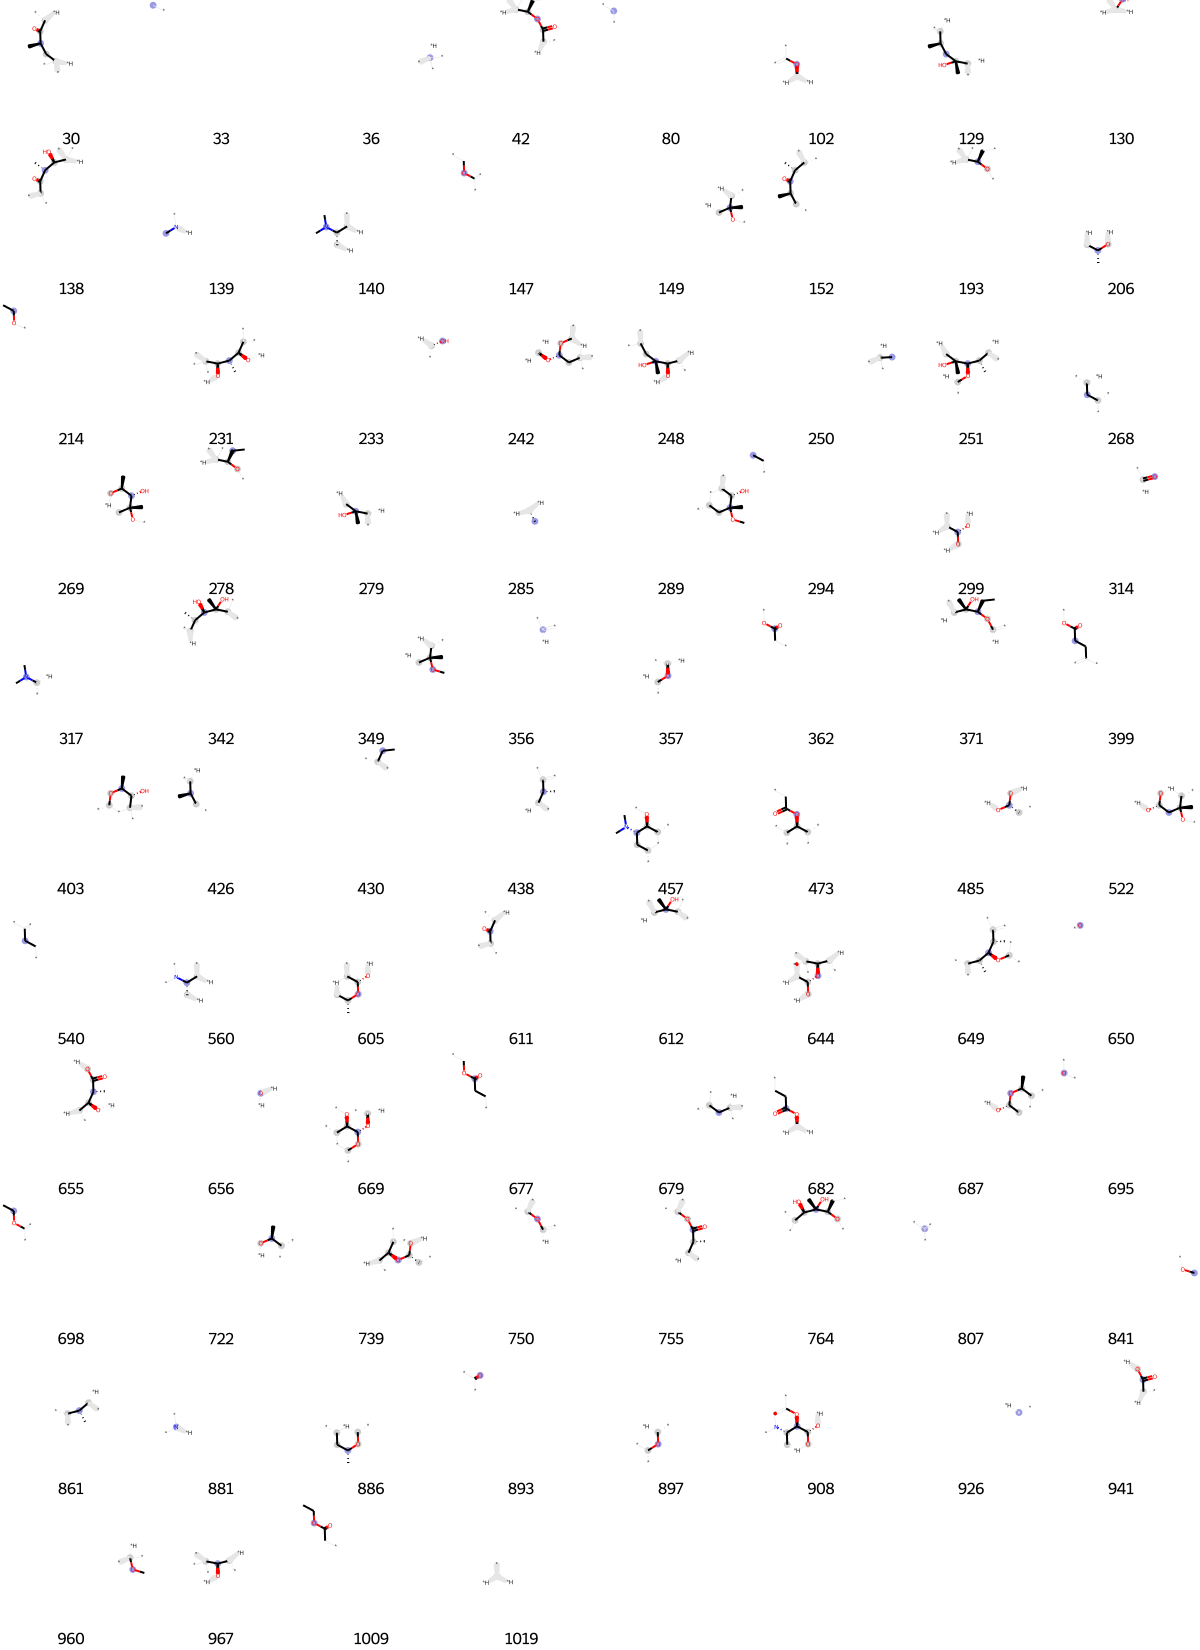

In [1455]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1456]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 6,
 33,
 64,
 72,
 114,
 175,
 267,
 349,
 356,
 378,
 382,
 389,
 391,
 393,
 413,
 485,
 512,
 546,
 592,
 640,
 650,
 664,
 695,
 726,
 739,
 767,
 778,
 807,
 820,
 831,
 841,
 849,
 875,
 893,
 906,
 993,
 997]

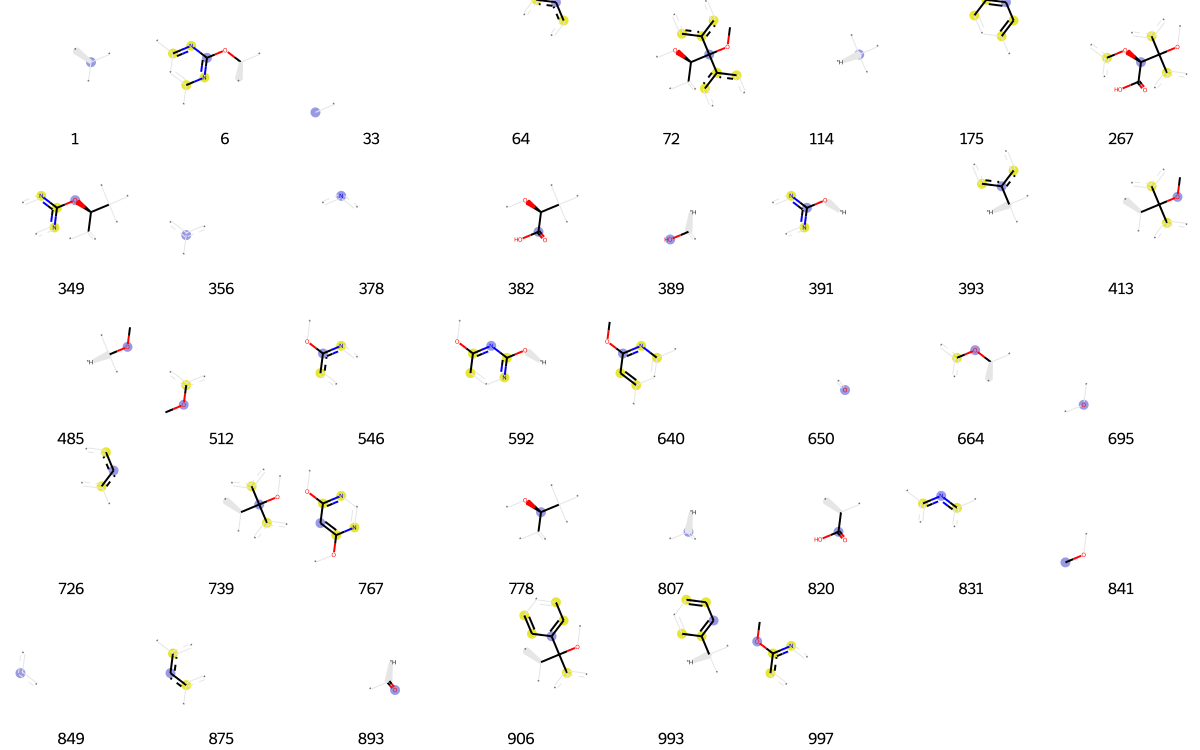

In [1457]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1458]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[19,
 64,
 173,
 175,
 193,
 228,
 322,
 356,
 378,
 389,
 437,
 511,
 562,
 579,
 593,
 695,
 726,
 806,
 842,
 849]

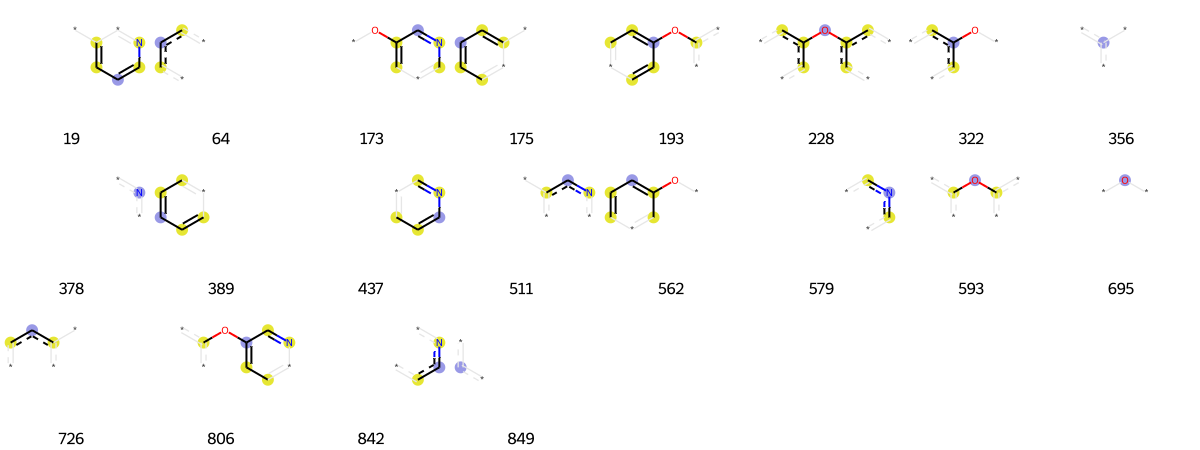

In [1459]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1460]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 34,
 36,
 91,
 92,
 102,
 112,
 114,
 121,
 171,
 211,
 216,
 217,
 255,
 265,
 305,
 314,
 346,
 347,
 356,
 360,
 361,
 368,
 378,
 389,
 407,
 428,
 453,
 456,
 509,
 511,
 527,
 561,
 571,
 602,
 629,
 635,
 650,
 653,
 659,
 662,
 669,
 673,
 674,
 723,
 726,
 739,
 744,
 779,
 790,
 801,
 807,
 849,
 875,
 893,
 926,
 930,
 935,
 955,
 994,
 1015,
 1019]

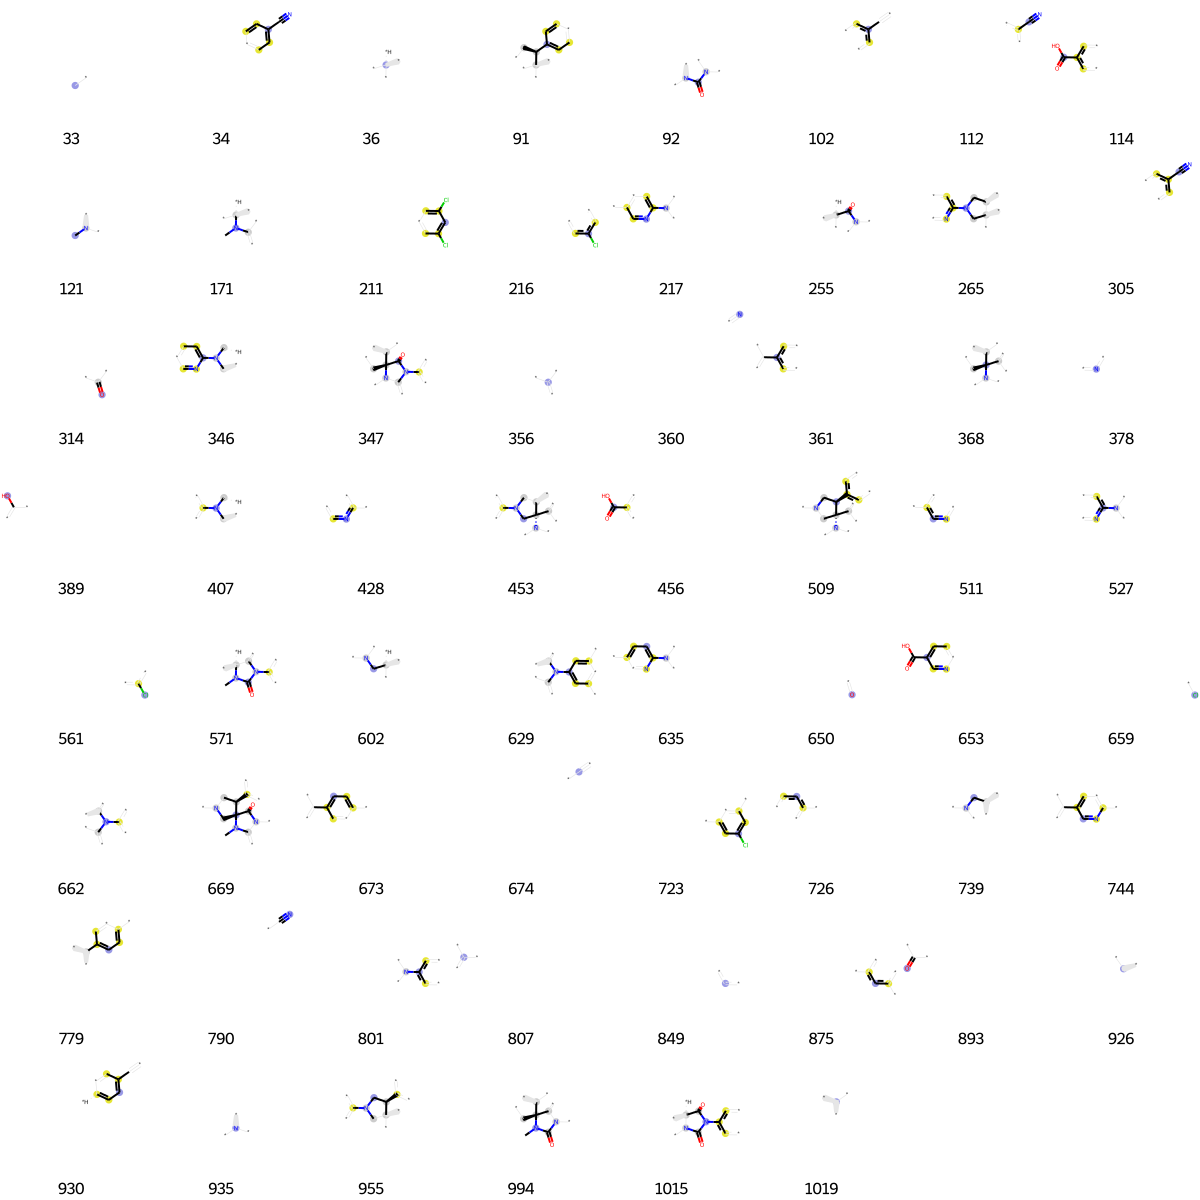

In [1461]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1462]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 36,
 51,
 59,
 78,
 80,
 84,
 130,
 138,
 182,
 189,
 192,
 199,
 233,
 240,
 250,
 283,
 301,
 314,
 315,
 356,
 373,
 404,
 408,
 412,
 465,
 486,
 504,
 507,
 519,
 520,
 529,
 547,
 563,
 580,
 620,
 622,
 650,
 679,
 692,
 695,
 714,
 715,
 738,
 787,
 807,
 849,
 886,
 893,
 914,
 926,
 967,
 973,
 980,
 997,
 1009,
 1019]

In [1463]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 41,
 53,
 80,
 128,
 171,
 191,
 289,
 294,
 332,
 356,
 358,
 401,
 416,
 420,
 540,
 578,
 591,
 637,
 646,
 650,
 694,
 726,
 731,
 745,
 754,
 775,
 792,
 794,
 807,
 843,
 849,
 887,
 893,
 901]

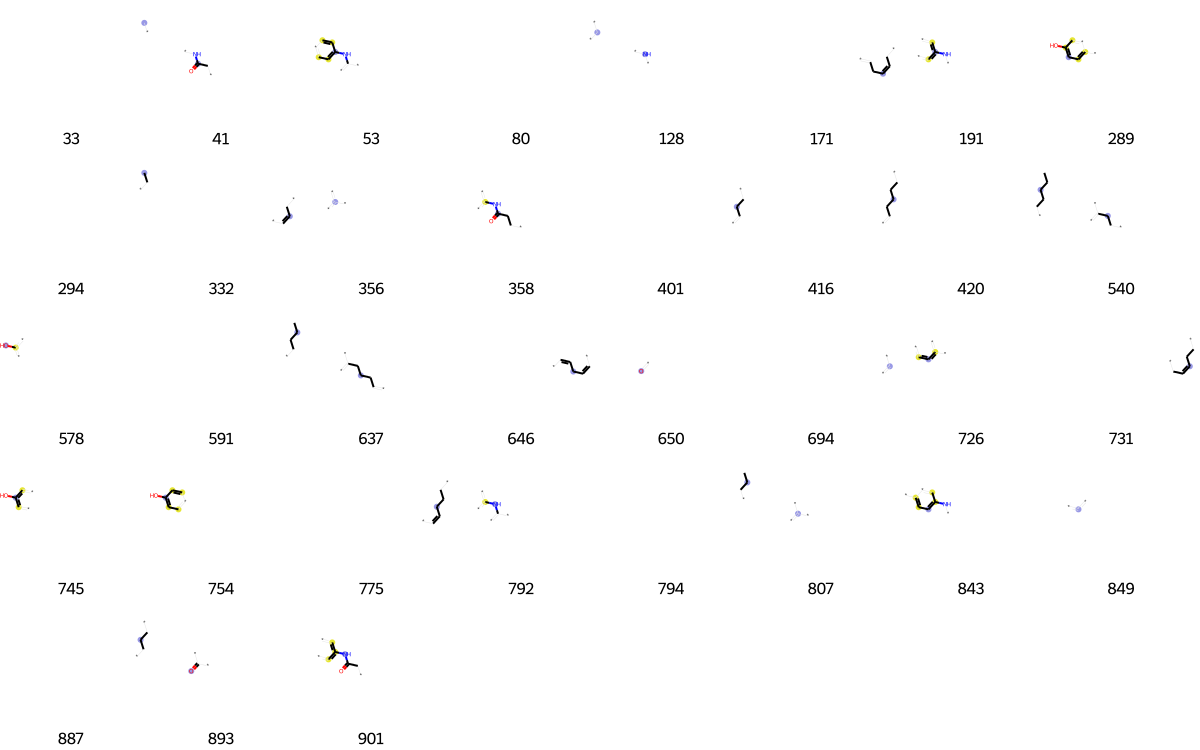

In [1464]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1465]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[36,
 80,
 81,
 133,
 145,
 212,
 251,
 373,
 541,
 602,
 650,
 652,
 715,
 728,
 753,
 807,
 838,
 893,
 926,
 935,
 939,
 985,
 987,
 1009,
 1016]

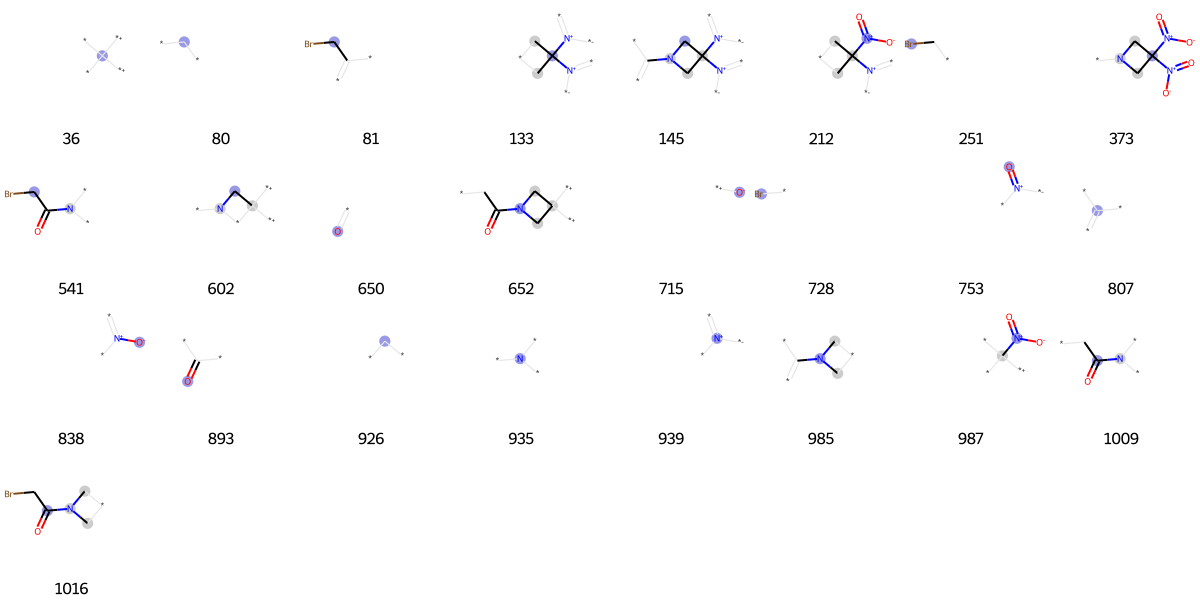

In [1466]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1467]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[64,
 77,
 82,
 97,
 112,
 161,
 175,
 356,
 384,
 394,
 607,
 693,
 715,
 726,
 842,
 849,
 935,
 946,
 1018]

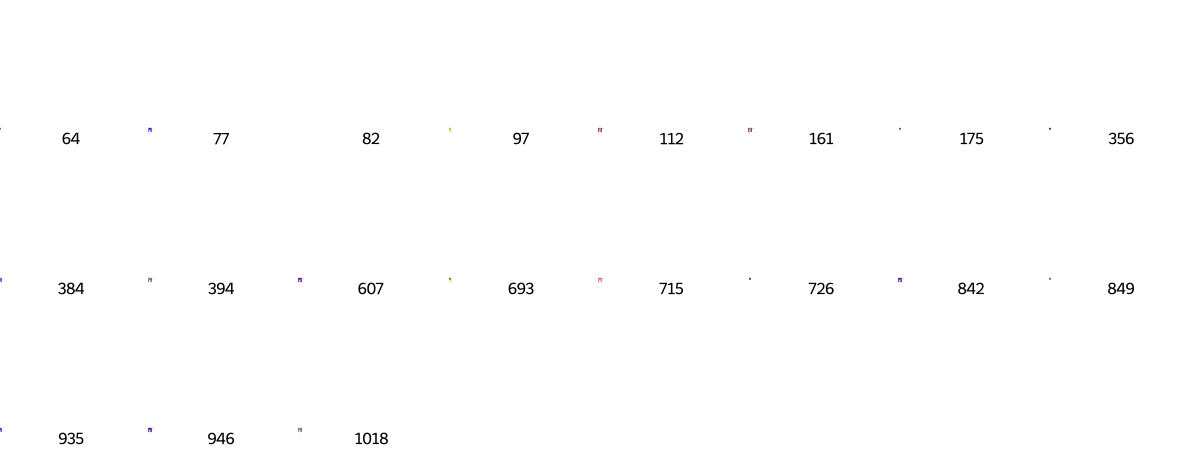

In [1468]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1469]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[15,
 64,
 140,
 147,
 261,
 309,
 356,
 361,
 433,
 496,
 647,
 650,
 703,
 726,
 807,
 814,
 849,
 875,
 888,
 893,
 961]

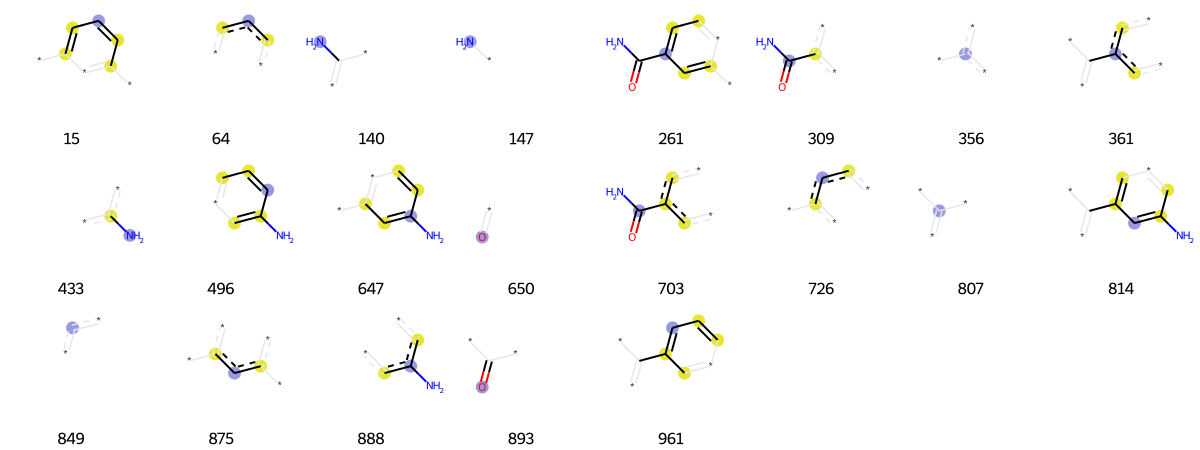

In [1470]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1471]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[3,
 15,
 33,
 46,
 125,
 170,
 218,
 231,
 249,
 312,
 313,
 314,
 322,
 332,
 356,
 378,
 444,
 452,
 457,
 480,
 512,
 578,
 580,
 583,
 612,
 635,
 650,
 656,
 672,
 675,
 695,
 698,
 705,
 718,
 723,
 726,
 781,
 789,
 807,
 818,
 823,
 841,
 849,
 875,
 881,
 885,
 926,
 946,
 948,
 975,
 991,
 998,
 1019]

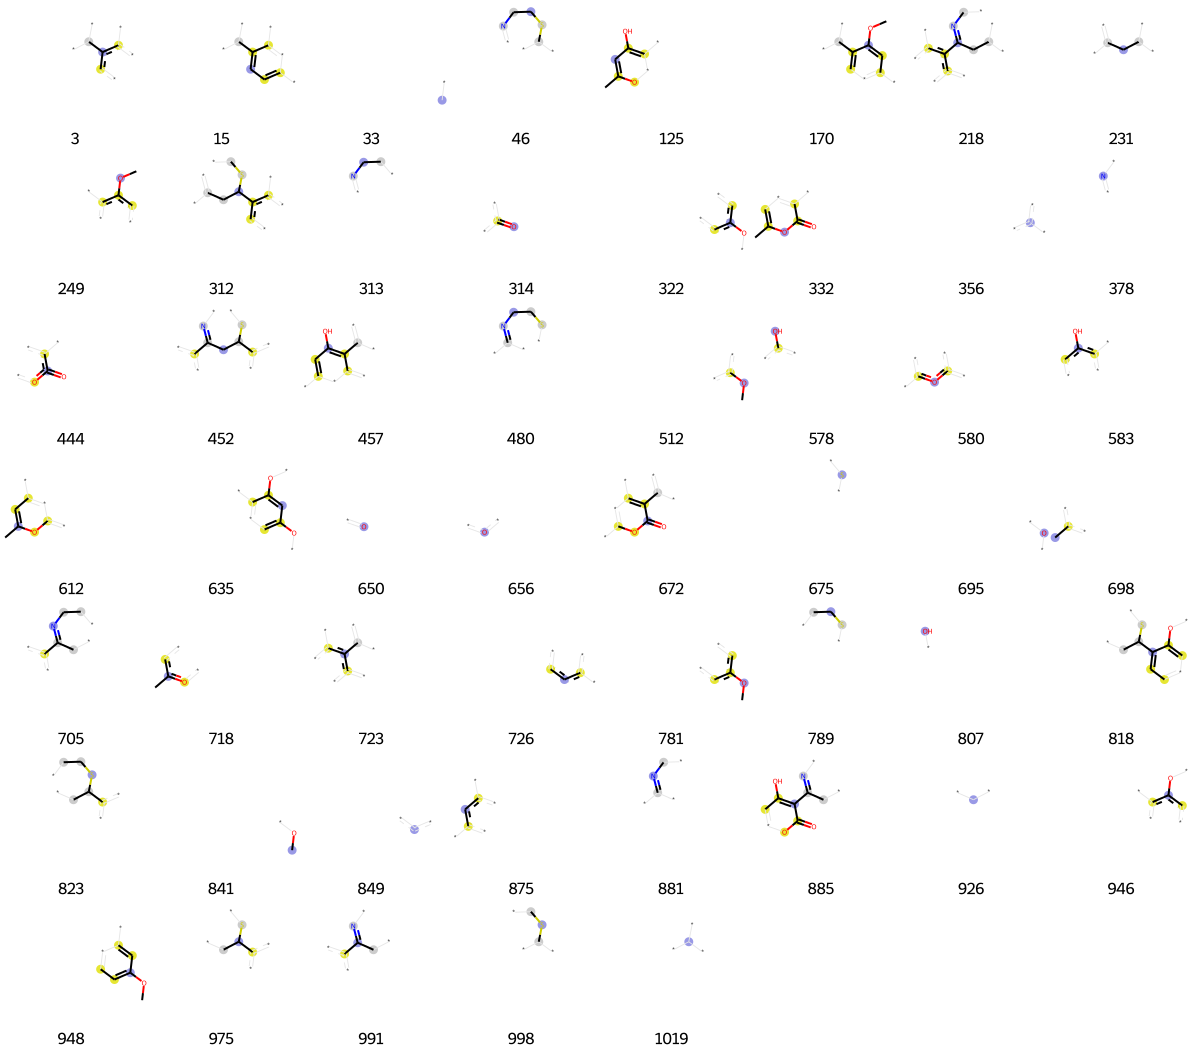

In [1472]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1473]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[29,
 56,
 64,
 80,
 128,
 175,
 198,
 216,
 255,
 279,
 304,
 310,
 317,
 319,
 350,
 356,
 361,
 366,
 389,
 452,
 464,
 465,
 486,
 502,
 561,
 602,
 638,
 641,
 650,
 659,
 673,
 699,
 715,
 726,
 730,
 745,
 807,
 816,
 849,
 875,
 893,
 904,
 942,
 961]

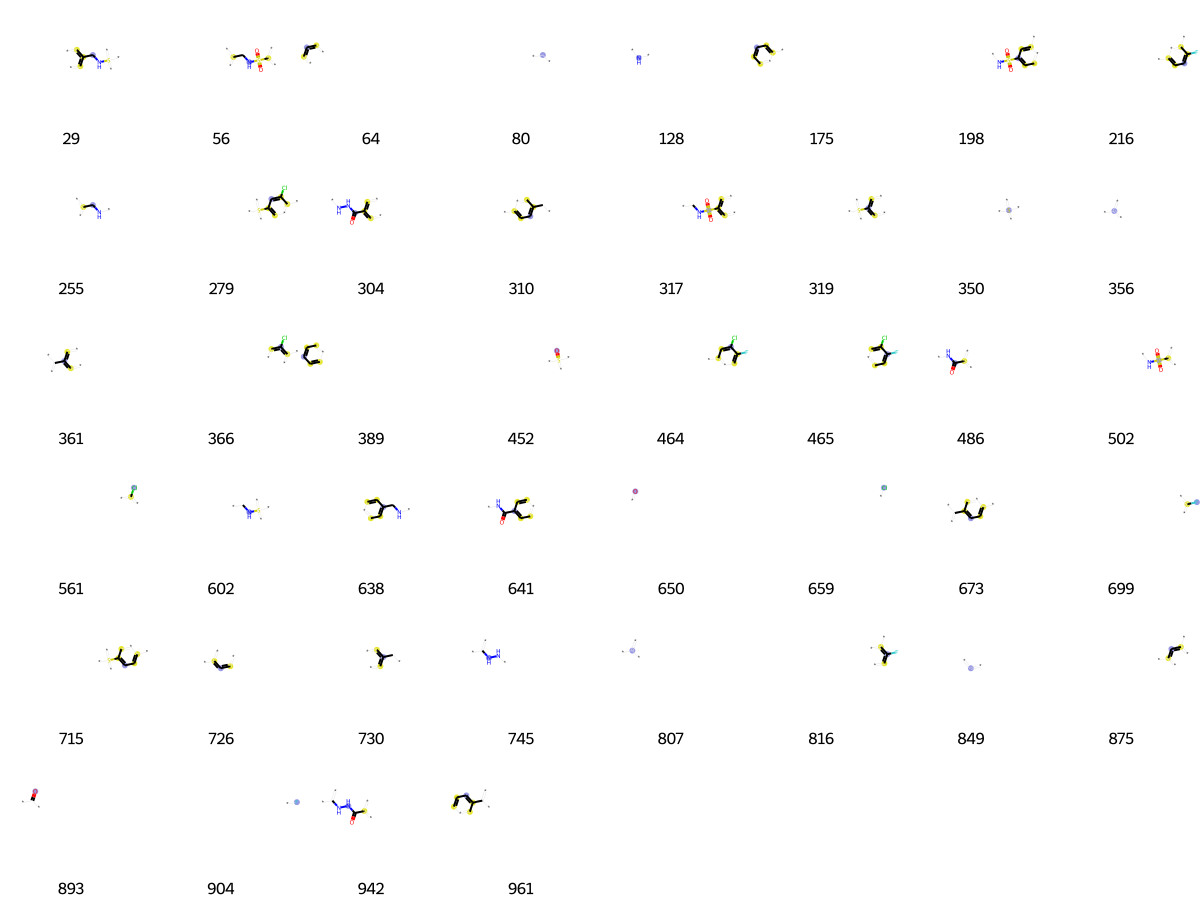

In [1474]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1475]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 13,
 15,
 33,
 36,
 64,
 69,
 80,
 90,
 145,
 147,
 171,
 217,
 219,
 250,
 255,
 283,
 297,
 356,
 440,
 484,
 486,
 568,
 585,
 586,
 627,
 639,
 650,
 695,
 698,
 715,
 726,
 753,
 785,
 807,
 838,
 841,
 849,
 871,
 875,
 878,
 893,
 916,
 939,
 954,
 987,
 1005,
 1019]

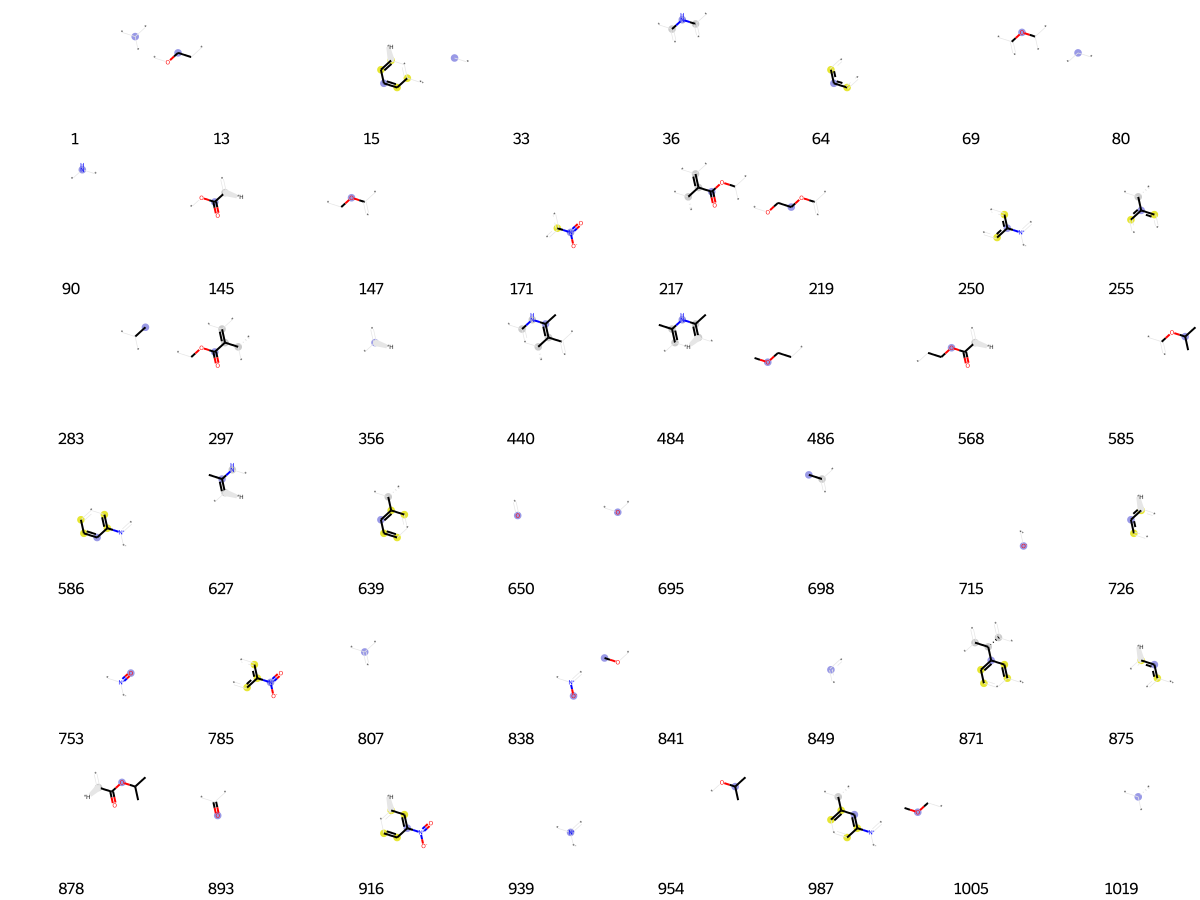

In [1476]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1477]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[23,
 73,
 114,
 136,
 141,
 155,
 211,
 212,
 216,
 225,
 356,
 361,
 372,
 378,
 389,
 419,
 456,
 561,
 580,
 595,
 650,
 656,
 659,
 673,
 723,
 726,
 784,
 807,
 831,
 849,
 856,
 875,
 893,
 937,
 961]

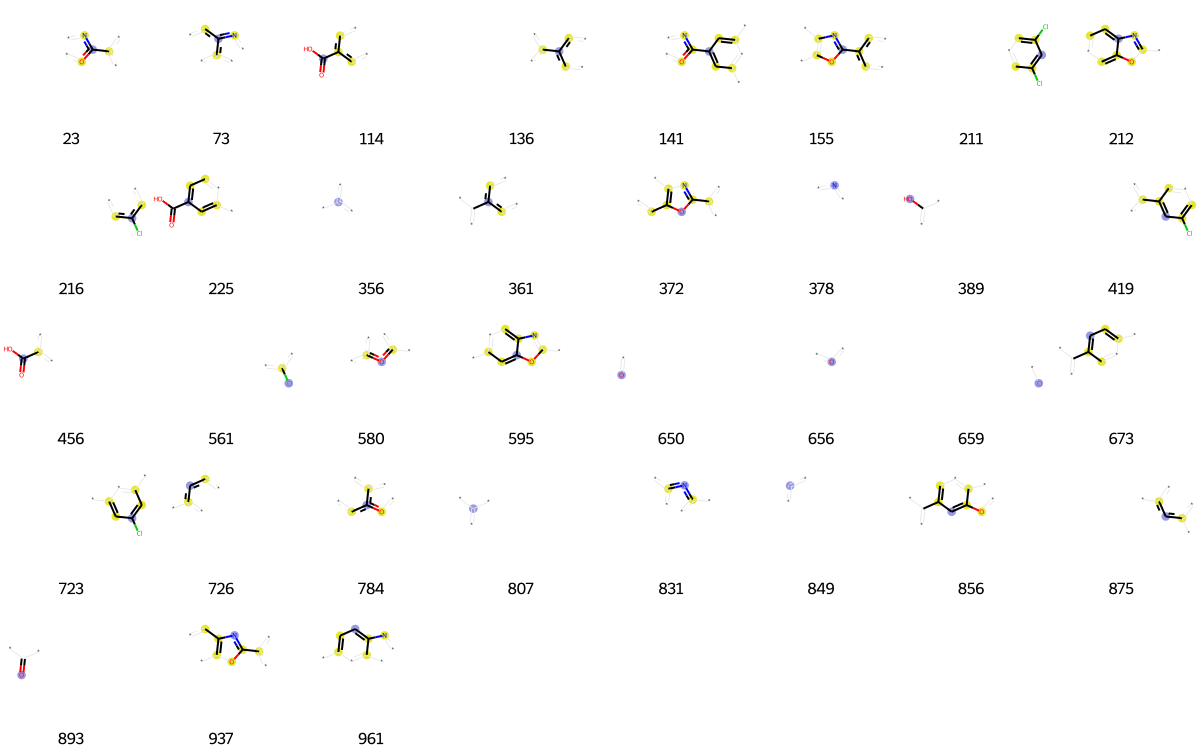

In [1478]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1479]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[9,
 15,
 29,
 36,
 64,
 74,
 80,
 104,
 130,
 138,
 150,
 160,
 175,
 212,
 214,
 231,
 248,
 264,
 270,
 301,
 311,
 333,
 356,
 361,
 368,
 389,
 451,
 456,
 470,
 474,
 549,
 556,
 578,
 580,
 583,
 632,
 647,
 649,
 656,
 682,
 726,
 736,
 737,
 750,
 784,
 807,
 840,
 849,
 884,
 889,
 899,
 908,
 926,
 935,
 940,
 956,
 998,
 1002,
 1019]

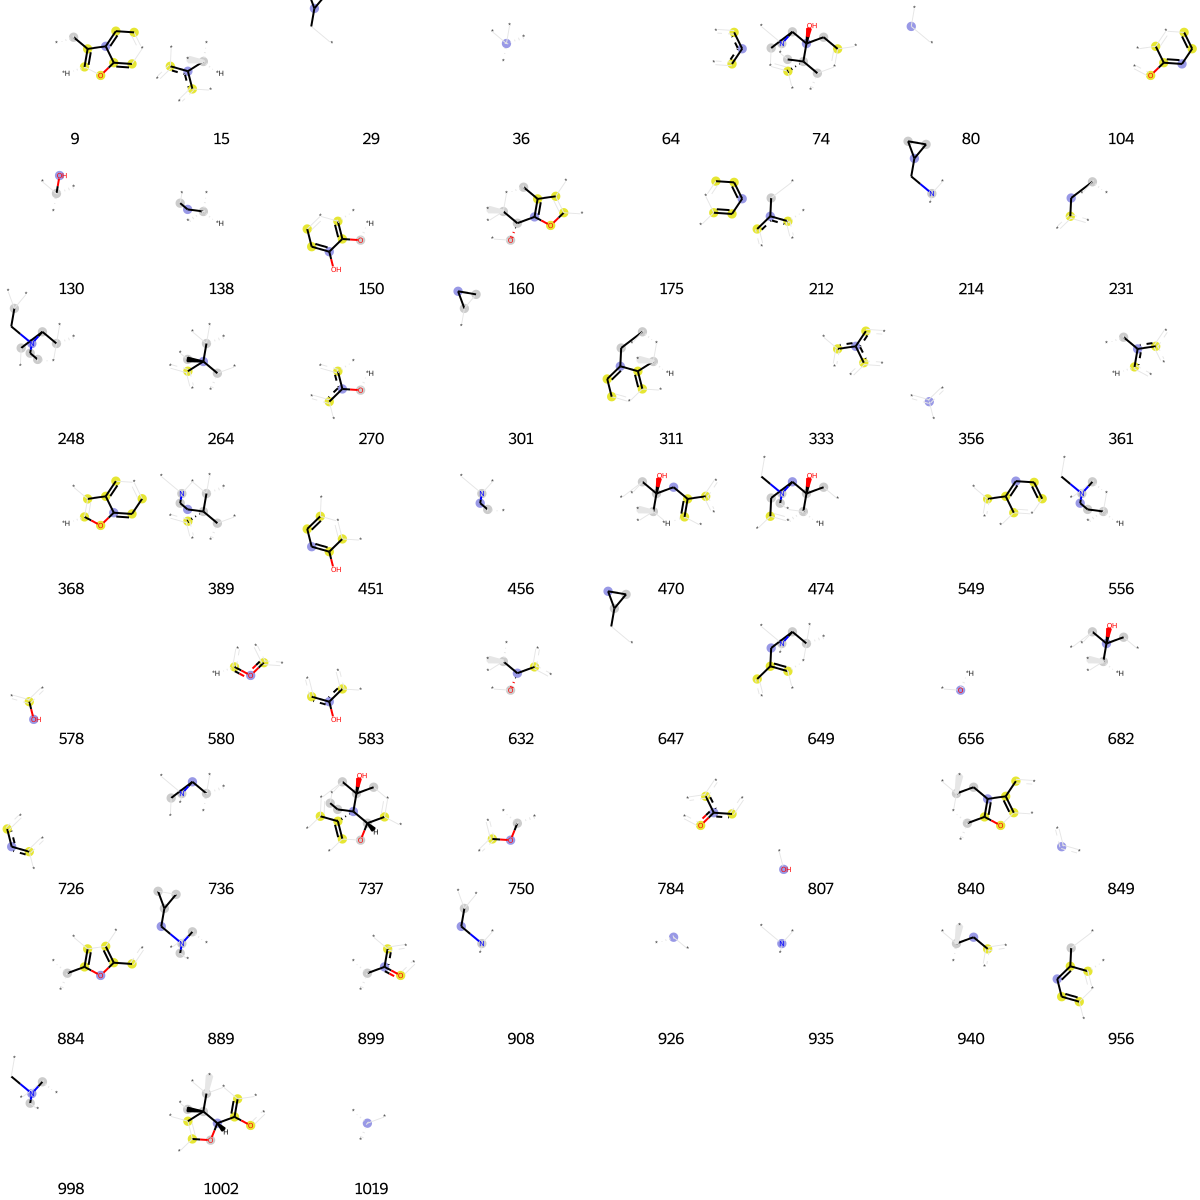

In [1480]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1481]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[33,
 80,
 114,
 121,
 123,
 145,
 147,
 197,
 207,
 235,
 242,
 269,
 319,
 344,
 350,
 356,
 367,
 371,
 446,
 452,
 456,
 550,
 592,
 599,
 626,
 650,
 674,
 695,
 698,
 699,
 713,
 715,
 726,
 757,
 799,
 804,
 807,
 849,
 851,
 893,
 896,
 915,
 922,
 926,
 935,
 974]

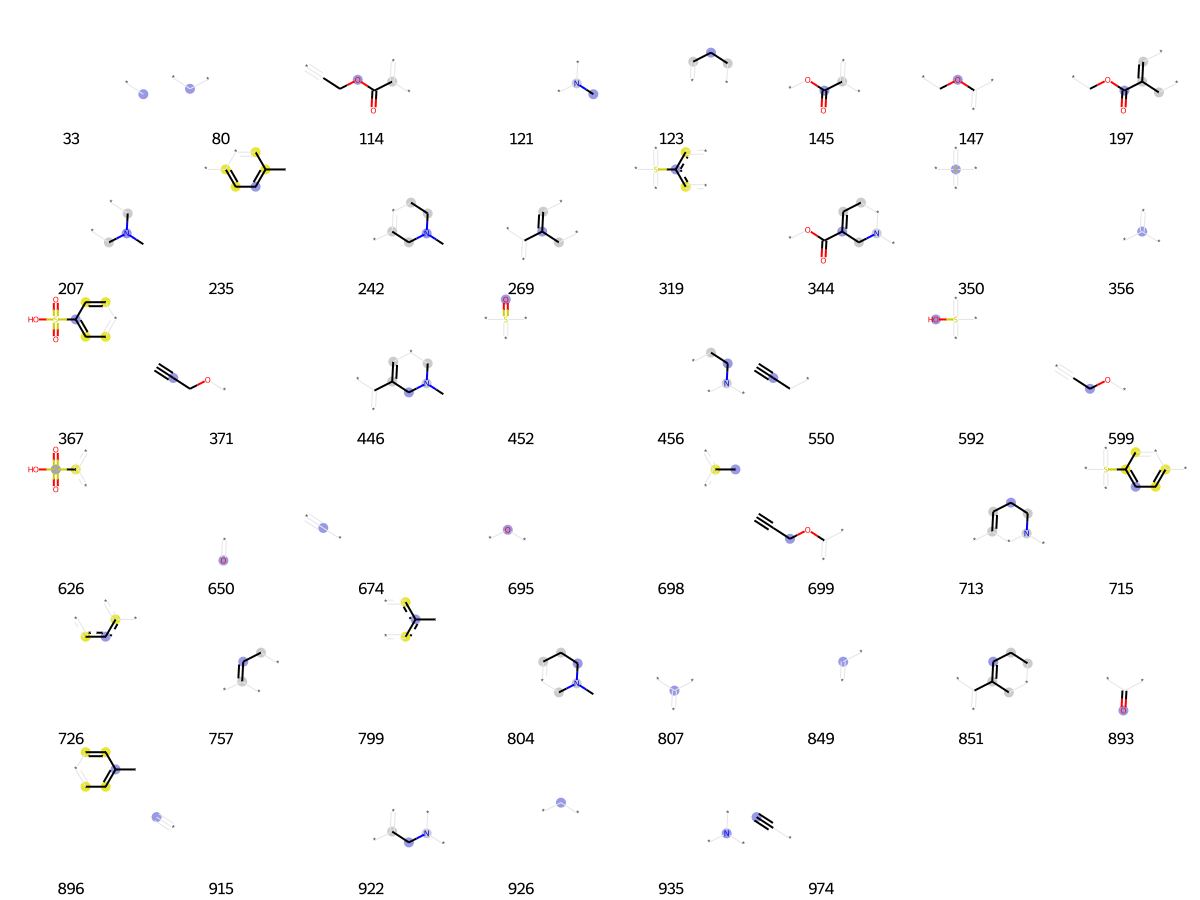

In [1482]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1483]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[11,
 18,
 33,
 90,
 140,
 142,
 147,
 240,
 273,
 300,
 351,
 356,
 378,
 428,
 440,
 511,
 543,
 546,
 552,
 589,
 635,
 656,
 675,
 684,
 698,
 721,
 725,
 807,
 831,
 837,
 838,
 849,
 887,
 971,
 980]

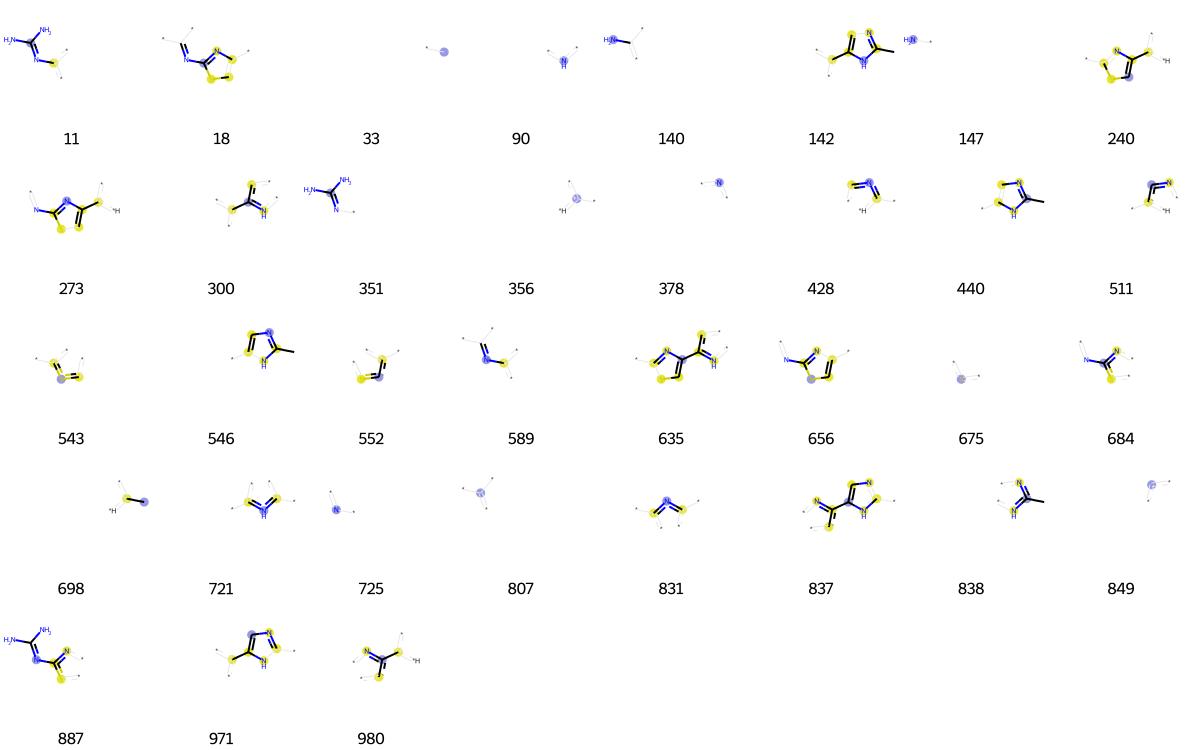

In [1484]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1485]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 33,
 64,
 75,
 80,
 90,
 131,
 139,
 175,
 186,
 341,
 356,
 378,
 389,
 428,
 448,
 501,
 529,
 557,
 567,
 652,
 693,
 726,
 738,
 739,
 842,
 845,
 849,
 881,
 927]

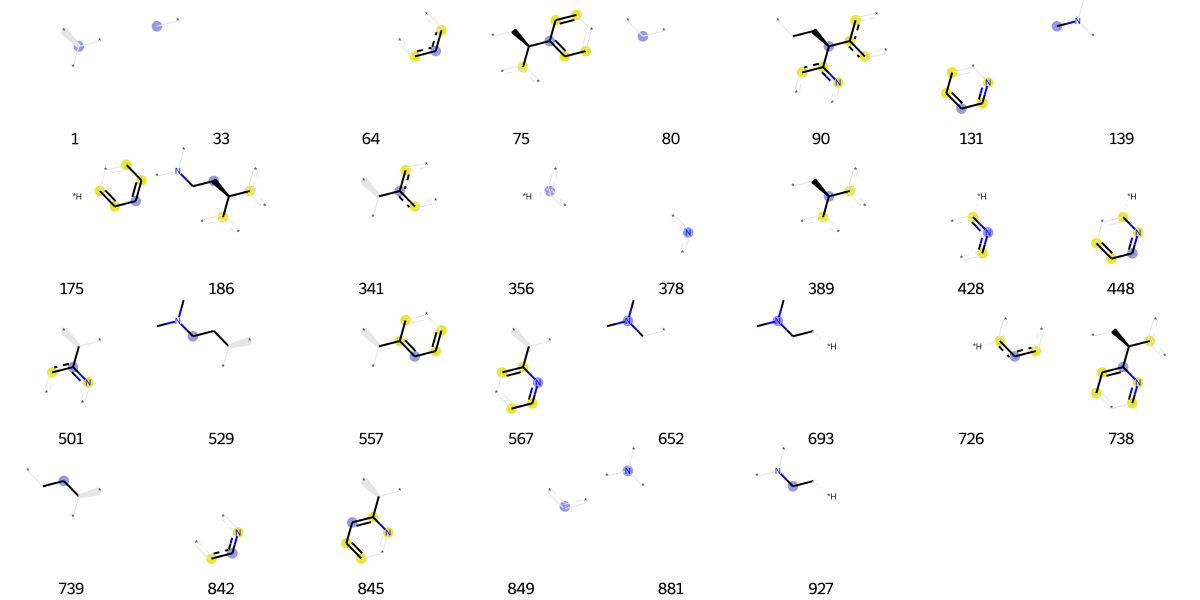

In [1486]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1487]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[26,
 33,
 54,
 63,
 64,
 72,
 73,
 114,
 115,
 119,
 136,
 146,
 152,
 158,
 168,
 175,
 204,
 212,
 233,
 289,
 314,
 316,
 333,
 342,
 356,
 360,
 372,
 378,
 392,
 393,
 427,
 428,
 441,
 463,
 477,
 499,
 511,
 608,
 609,
 629,
 641,
 645,
 650,
 656,
 662,
 674,
 714,
 726,
 727,
 762,
 785,
 790,
 801,
 831,
 849,
 875,
 896,
 926,
 935,
 959,
 961]

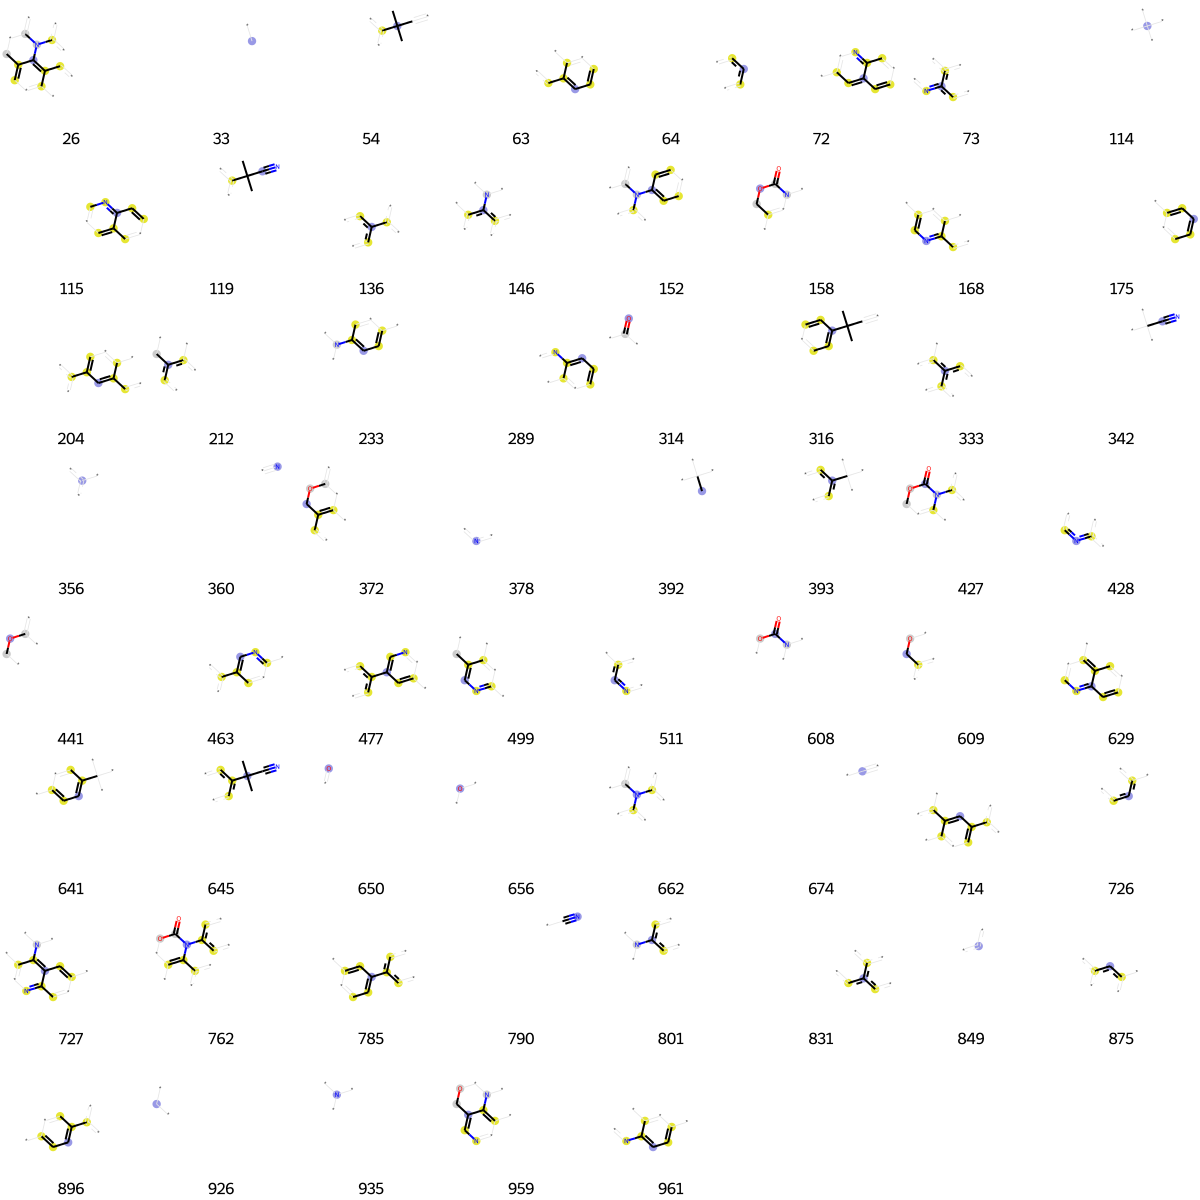

In [1488]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1489]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 10,
 53,
 64,
 89,
 90,
 128,
 133,
 175,
 191,
 211,
 218,
 255,
 268,
 314,
 356,
 375,
 389,
 408,
 429,
 607,
 625,
 634,
 639,
 640,
 650,
 726,
 728,
 792,
 795,
 807,
 843,
 849,
 854,
 893,
 909,
 935,
 939,
 956,
 1019]

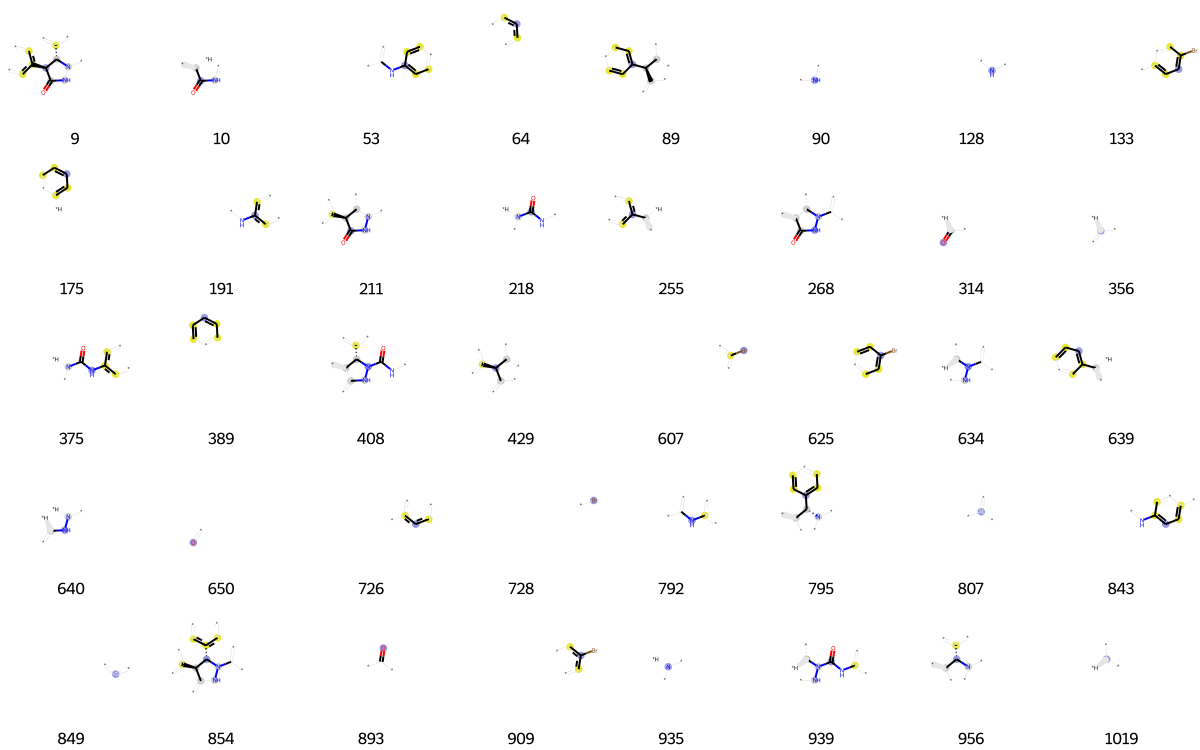

In [1490]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1491]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 4,
 33,
 64,
 77,
 80,
 118,
 128,
 169,
 175,
 219,
 227,
 271,
 283,
 329,
 356,
 384,
 386,
 412,
 428,
 430,
 550,
 565,
 606,
 623,
 658,
 695,
 700,
 726,
 782,
 807,
 822,
 849,
 935,
 946,
 1006,
 1014]

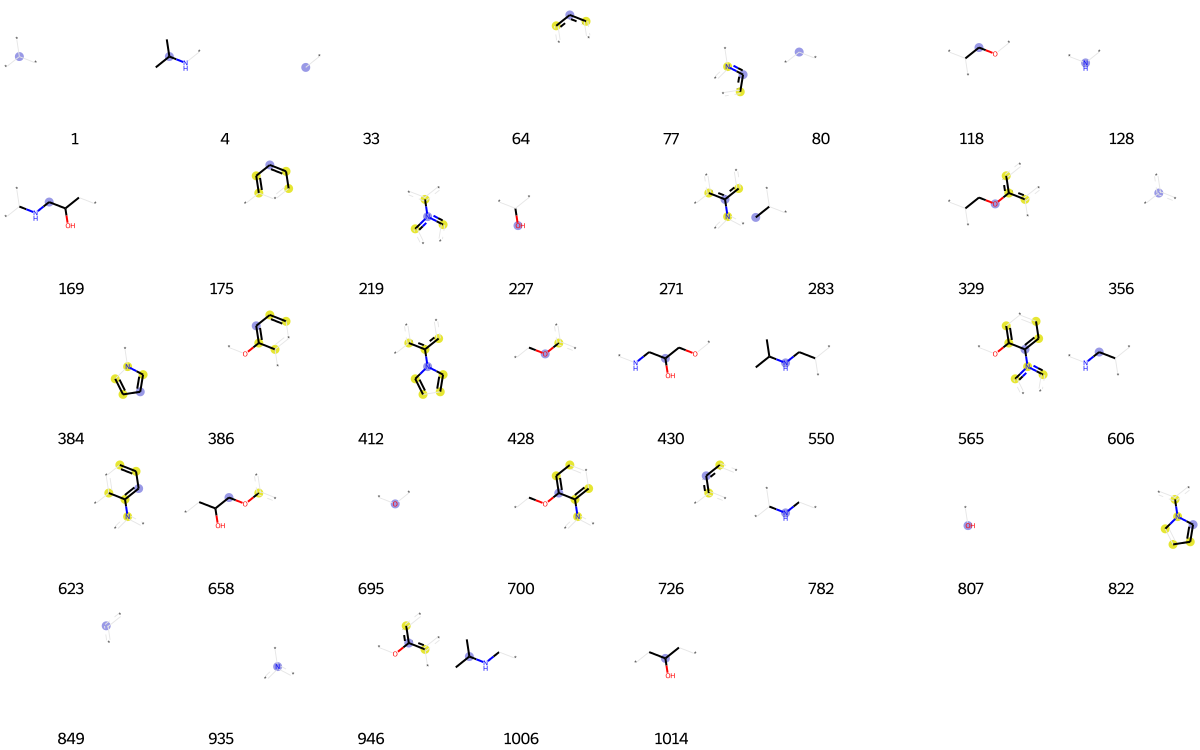

In [1492]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1493]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 33,
 64,
 75,
 90,
 116,
 128,
 136,
 155,
 175,
 225,
 270,
 283,
 286,
 323,
 341,
 356,
 378,
 386,
 389,
 394,
 408,
 428,
 445,
 448,
 456,
 471,
 552,
 557,
 585,
 603,
 646,
 671,
 690,
 699,
 721,
 726,
 732,
 738,
 787,
 798,
 831,
 842,
 849,
 875,
 896,
 904,
 912,
 993]

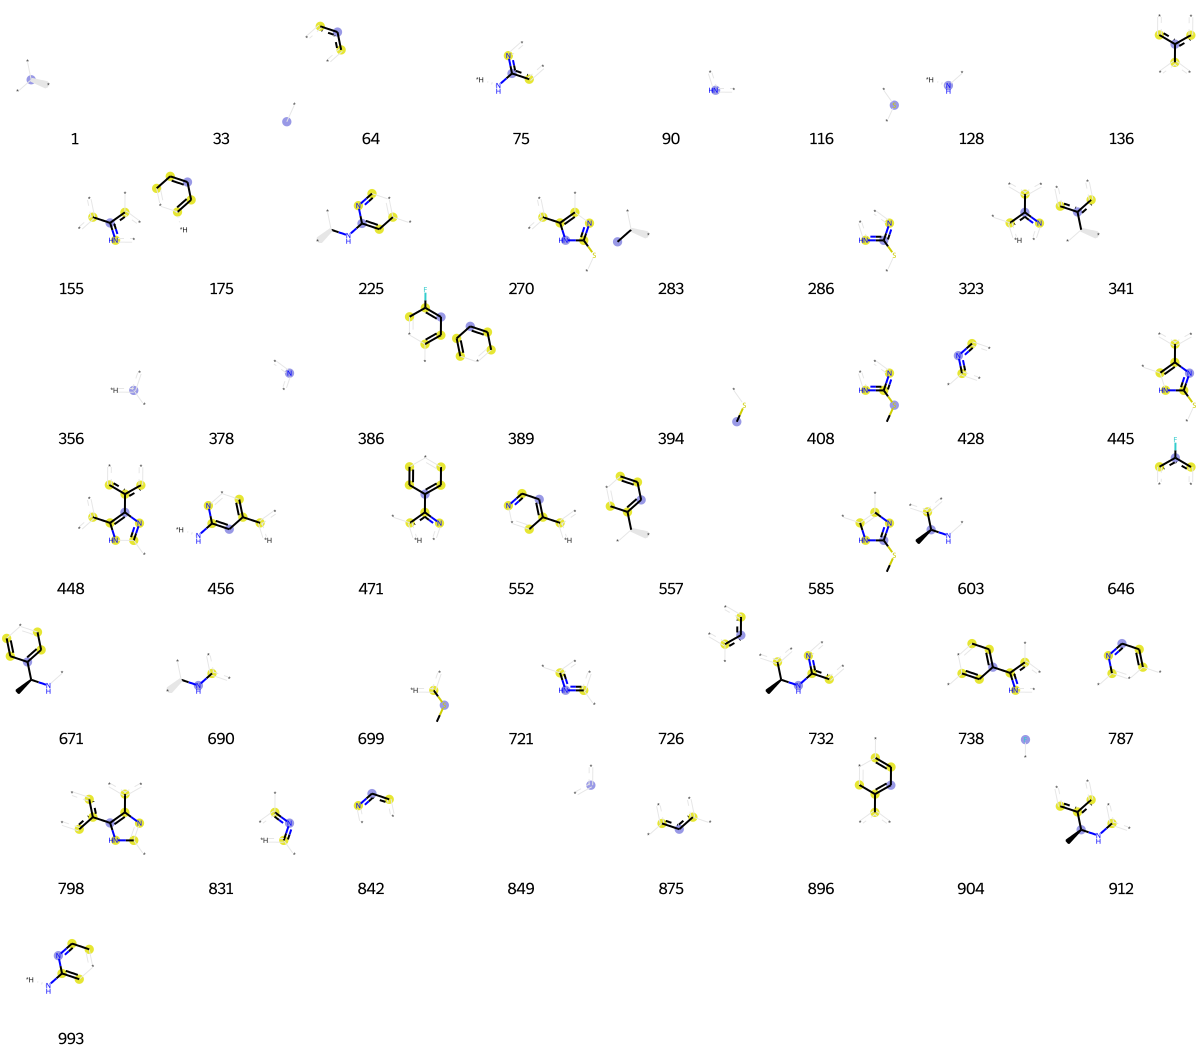

In [1494]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1495]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 80,
 86,
 119,
 243,
 263,
 294,
 332,
 389,
 401,
 416,
 420,
 432,
 540,
 591,
 639,
 650,
 694,
 713,
 775,
 794,
 807,
 823,
 887,
 893]

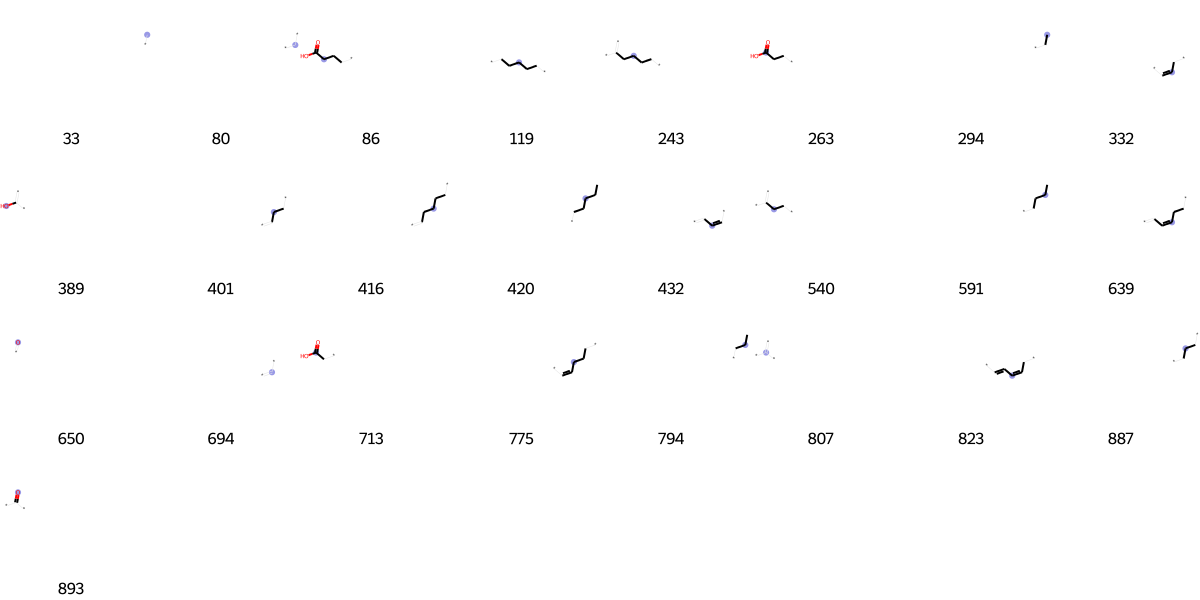

In [1496]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1497]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[0,
 53,
 59,
 114,
 128,
 191,
 236,
 328,
 356,
 361,
 383,
 393,
 429,
 486,
 641,
 650,
 673,
 726,
 771,
 792,
 807,
 809,
 843,
 849,
 884,
 893,
 904,
 954,
 965,
 1011]

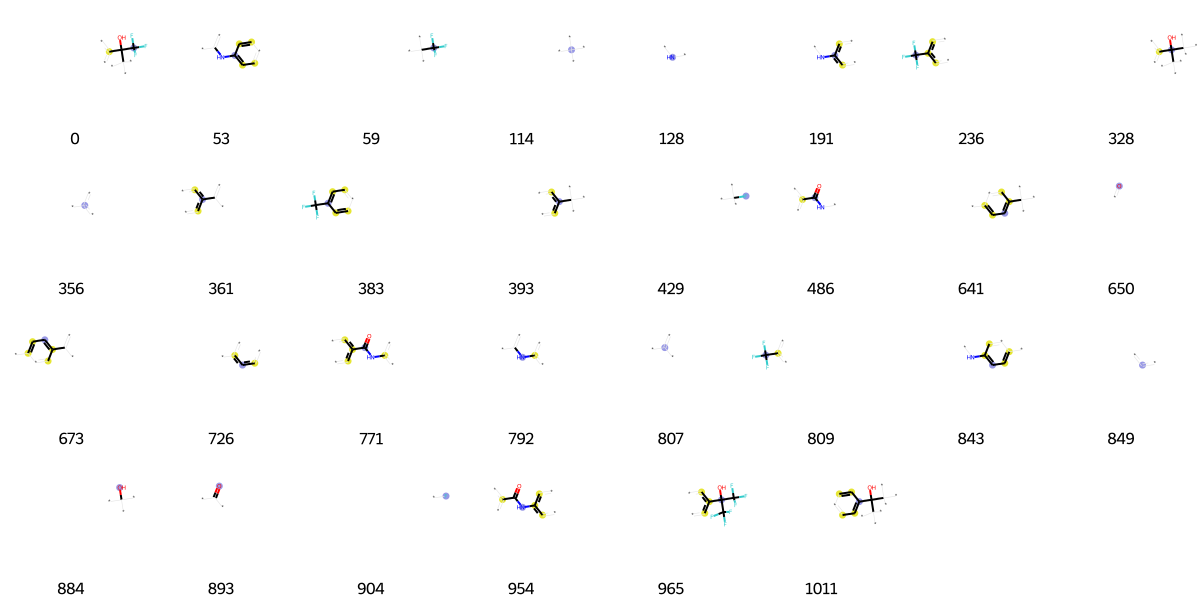

In [1498]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1499]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 3,
 14,
 15,
 31,
 33,
 42,
 58,
 64,
 80,
 94,
 99,
 112,
 128,
 189,
 242,
 274,
 283,
 294,
 322,
 353,
 356,
 416,
 428,
 453,
 456,
 470,
 477,
 514,
 520,
 543,
 548,
 554,
 562,
 599,
 606,
 610,
 650,
 651,
 675,
 695,
 698,
 714,
 726,
 749,
 799,
 807,
 849,
 875,
 893,
 902,
 926,
 935,
 978,
 1004,
 1009,
 1013,
 1019,
 1023]

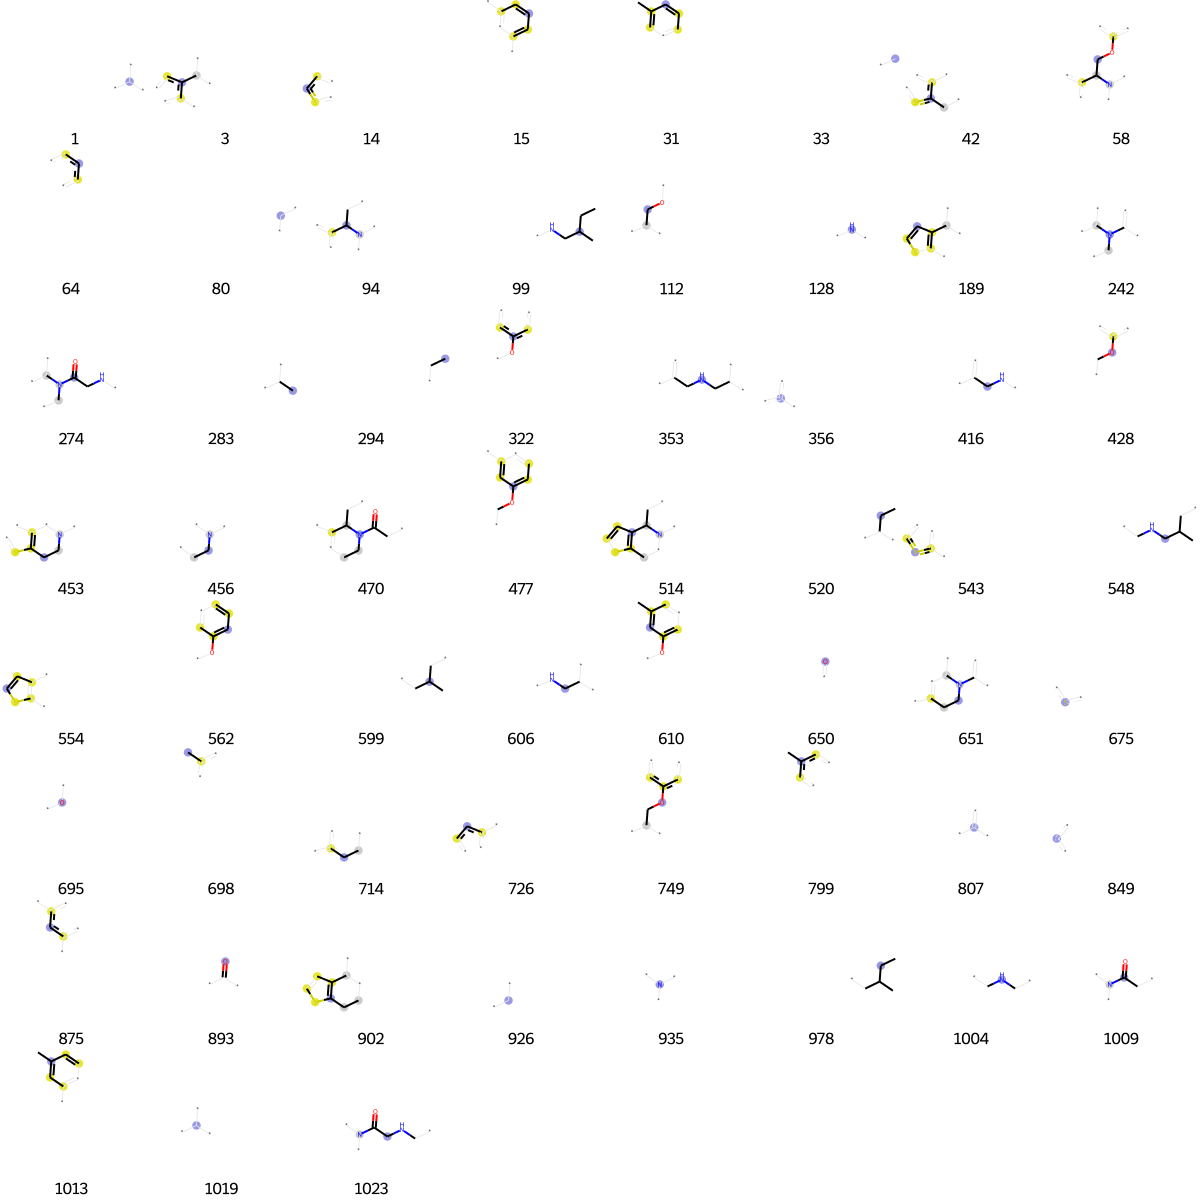

In [1500]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1501]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[21,
 46,
 80,
 128,
 206,
 216,
 219,
 295,
 310,
 317,
 319,
 325,
 350,
 356,
 389,
 452,
 483,
 502,
 561,
 602,
 650,
 659,
 667,
 713,
 715,
 726,
 730,
 732,
 807,
 816,
 849,
 883,
 893,
 913,
 914]

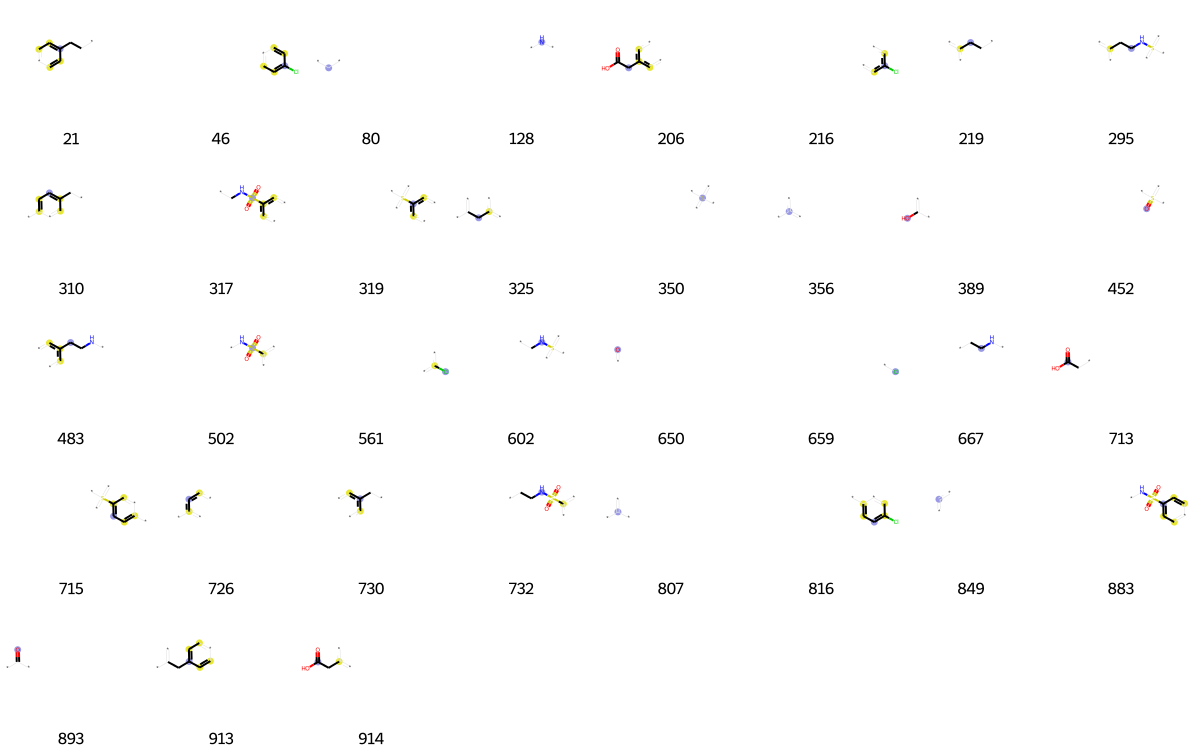

In [1502]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1503]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 64,
 70,
 80,
 102,
 114,
 115,
 119,
 169,
 175,
 181,
 215,
 221,
 222,
 240,
 268,
 278,
 279,
 294,
 295,
 301,
 333,
 356,
 389,
 393,
 399,
 423,
 575,
 591,
 650,
 695,
 716,
 721,
 726,
 762,
 807,
 849,
 893,
 926,
 982,
 993,
 1019]

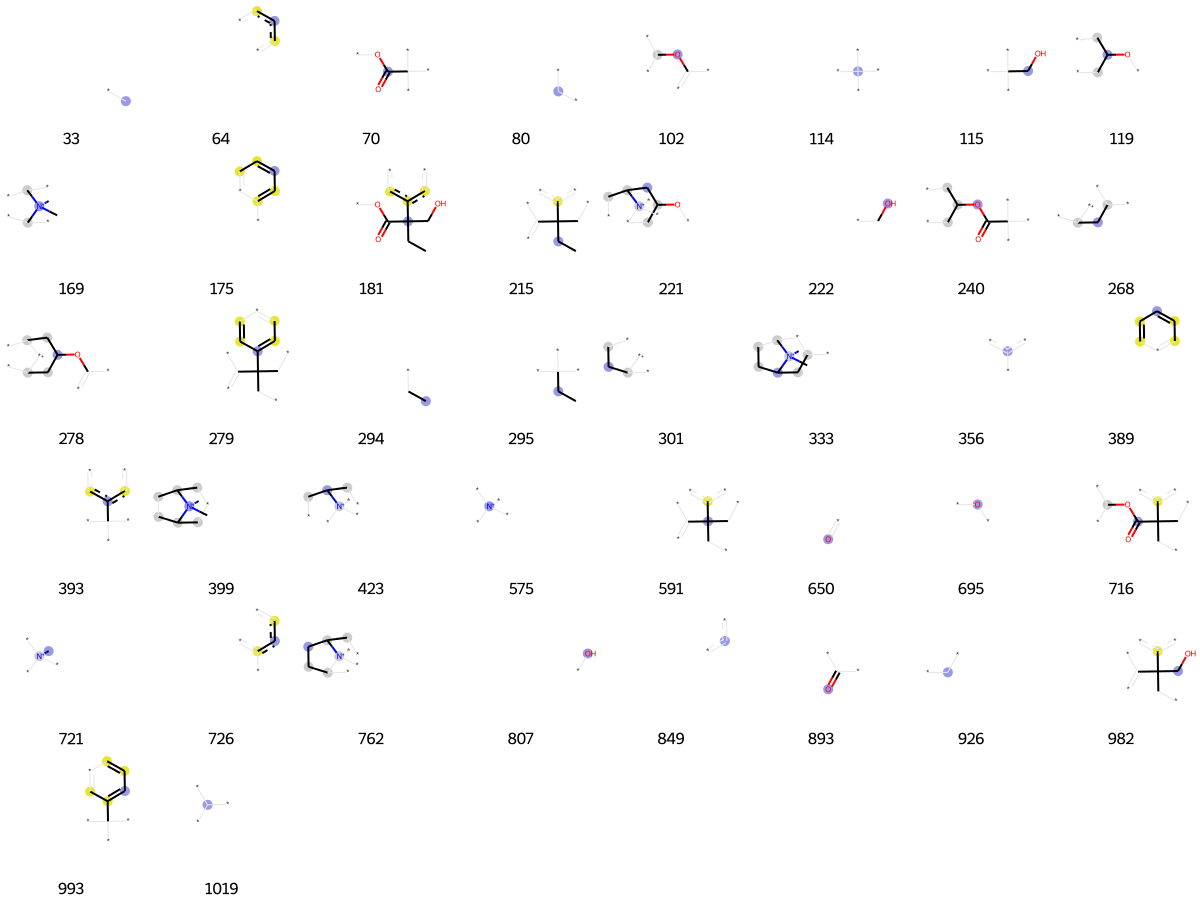

In [1504]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1505]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 36,
 72,
 74,
 90,
 128,
 139,
 219,
 331,
 350,
 355,
 356,
 452,
 462,
 561,
 592,
 628,
 650,
 675,
 676,
 692,
 726,
 742,
 807,
 849,
 875,
 881,
 949,
 958,
 960,
 1020]

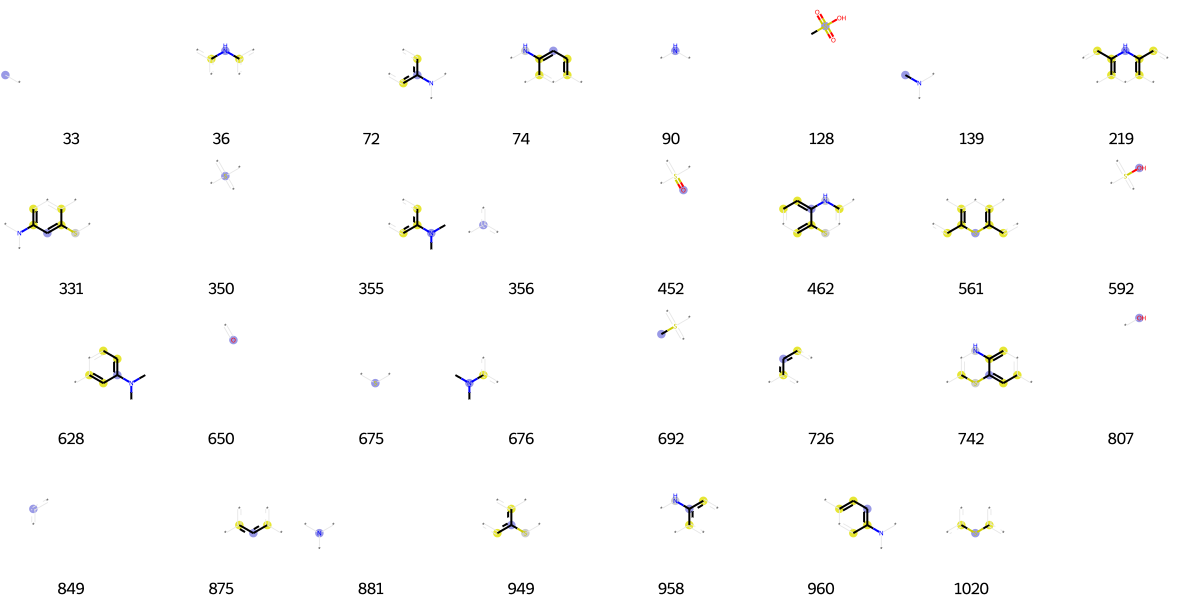

In [1506]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1507]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[27,
 33,
 41,
 42,
 54,
 59,
 64,
 80,
 102,
 114,
 128,
 147,
 175,
 316,
 322,
 354,
 356,
 389,
 392,
 393,
 562,
 647,
 650,
 726,
 730,
 807,
 849,
 888,
 893,
 918,
 981,
 993]

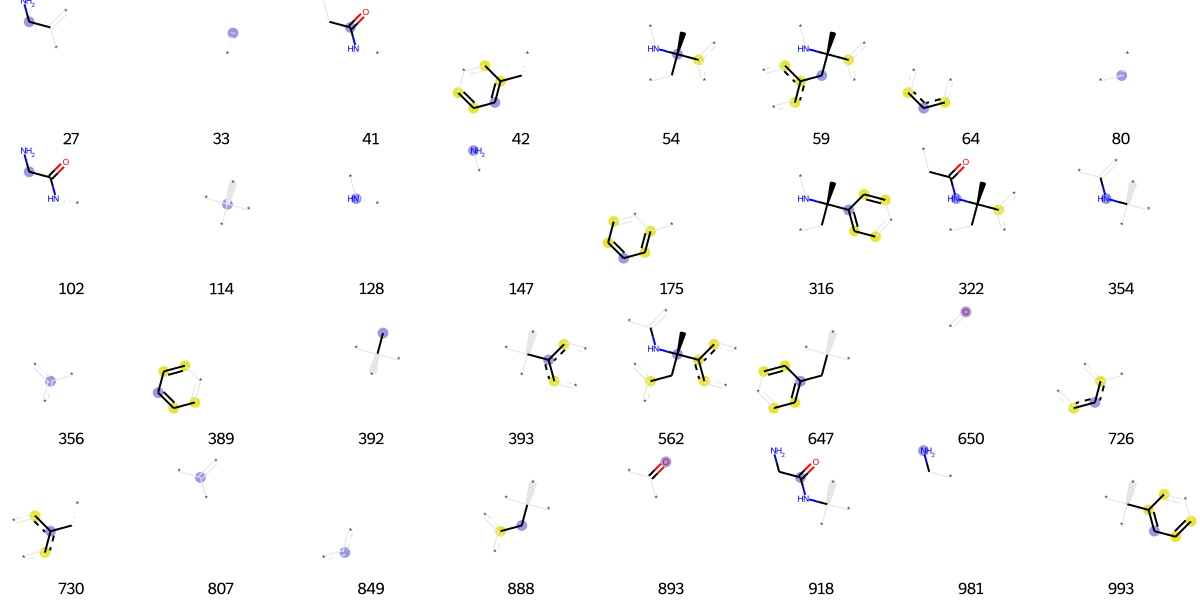

In [1508]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1509]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[8,
 13,
 33,
 39,
 80,
 89,
 114,
 136,
 207,
 219,
 248,
 305,
 314,
 328,
 333,
 356,
 361,
 367,
 378,
 428,
 429,
 432,
 510,
 518,
 521,
 551,
 558,
 616,
 656,
 695,
 697,
 698,
 707,
 809,
 828,
 831,
 849,
 875,
 886,
 887,
 904,
 910,
 928,
 989,
 1020]

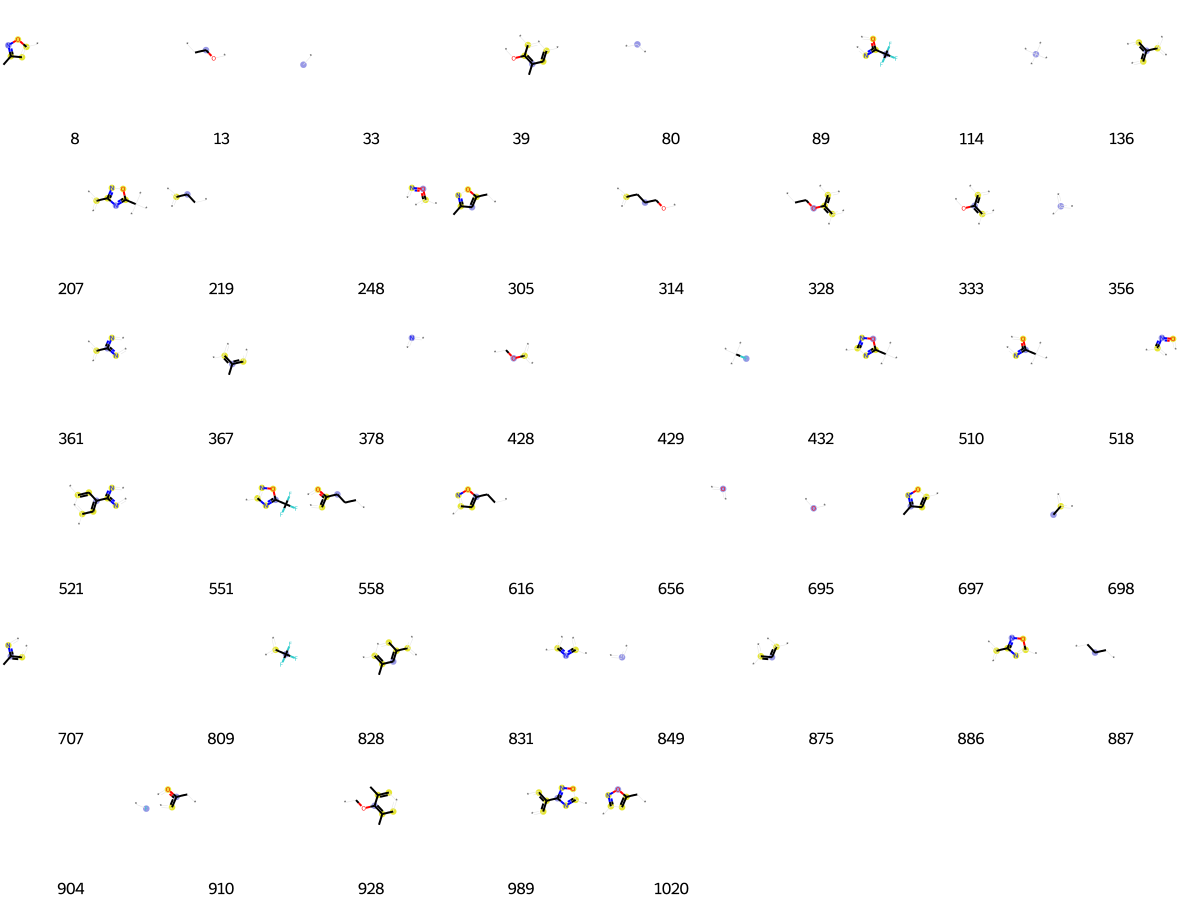

In [1510]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1511]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 21,
 33,
 42,
 64,
 80,
 128,
 175,
 219,
 220,
 227,
 267,
 283,
 289,
 341,
 348,
 356,
 389,
 474,
 514,
 573,
 578,
 726,
 730,
 739,
 745,
 754,
 782,
 803,
 807,
 829,
 849,
 886,
 979,
 994,
 1004]

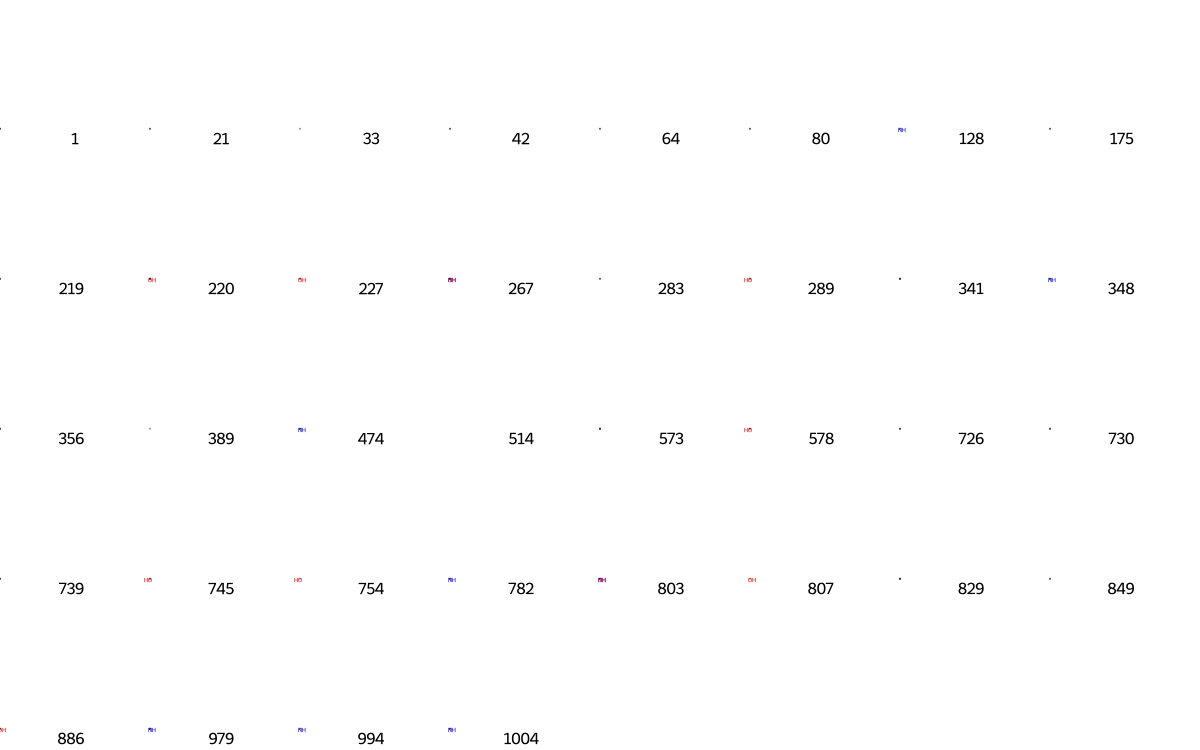

In [1512]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1513]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 36,
 69,
 80,
 84,
 93,
 103,
 114,
 130,
 138,
 173,
 177,
 198,
 227,
 233,
 250,
 254,
 268,
 284,
 301,
 314,
 321,
 356,
 367,
 392,
 412,
 419,
 453,
 462,
 504,
 516,
 526,
 555,
 642,
 650,
 670,
 679,
 697,
 699,
 739,
 752,
 781,
 807,
 826,
 849,
 855,
 865,
 883,
 884,
 926,
 946,
 977,
 1019]

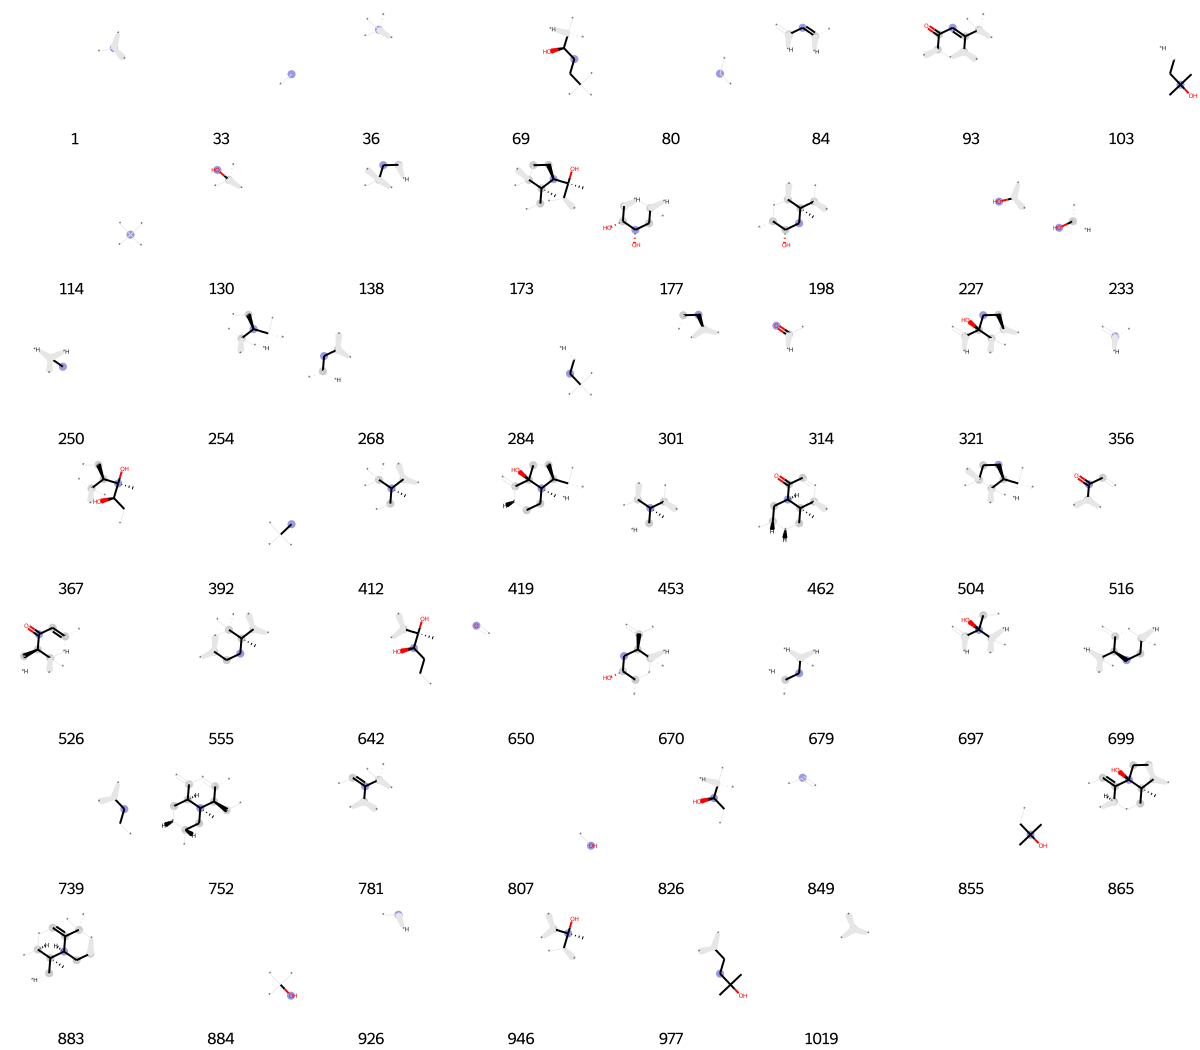

In [1514]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1515]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[11,
 33,
 36,
 79,
 84,
 86,
 93,
 102,
 138,
 157,
 176,
 184,
 240,
 249,
 250,
 266,
 267,
 285,
 301,
 314,
 356,
 375,
 389,
 412,
 418,
 443,
 453,
 470,
 474,
 478,
 516,
 521,
 555,
 558,
 559,
 621,
 650,
 695,
 708,
 729,
 772,
 781,
 807,
 835,
 849,
 853,
 855,
 857,
 858,
 861,
 872,
 893,
 926,
 927,
 935,
 973,
 992,
 1017,
 1019]

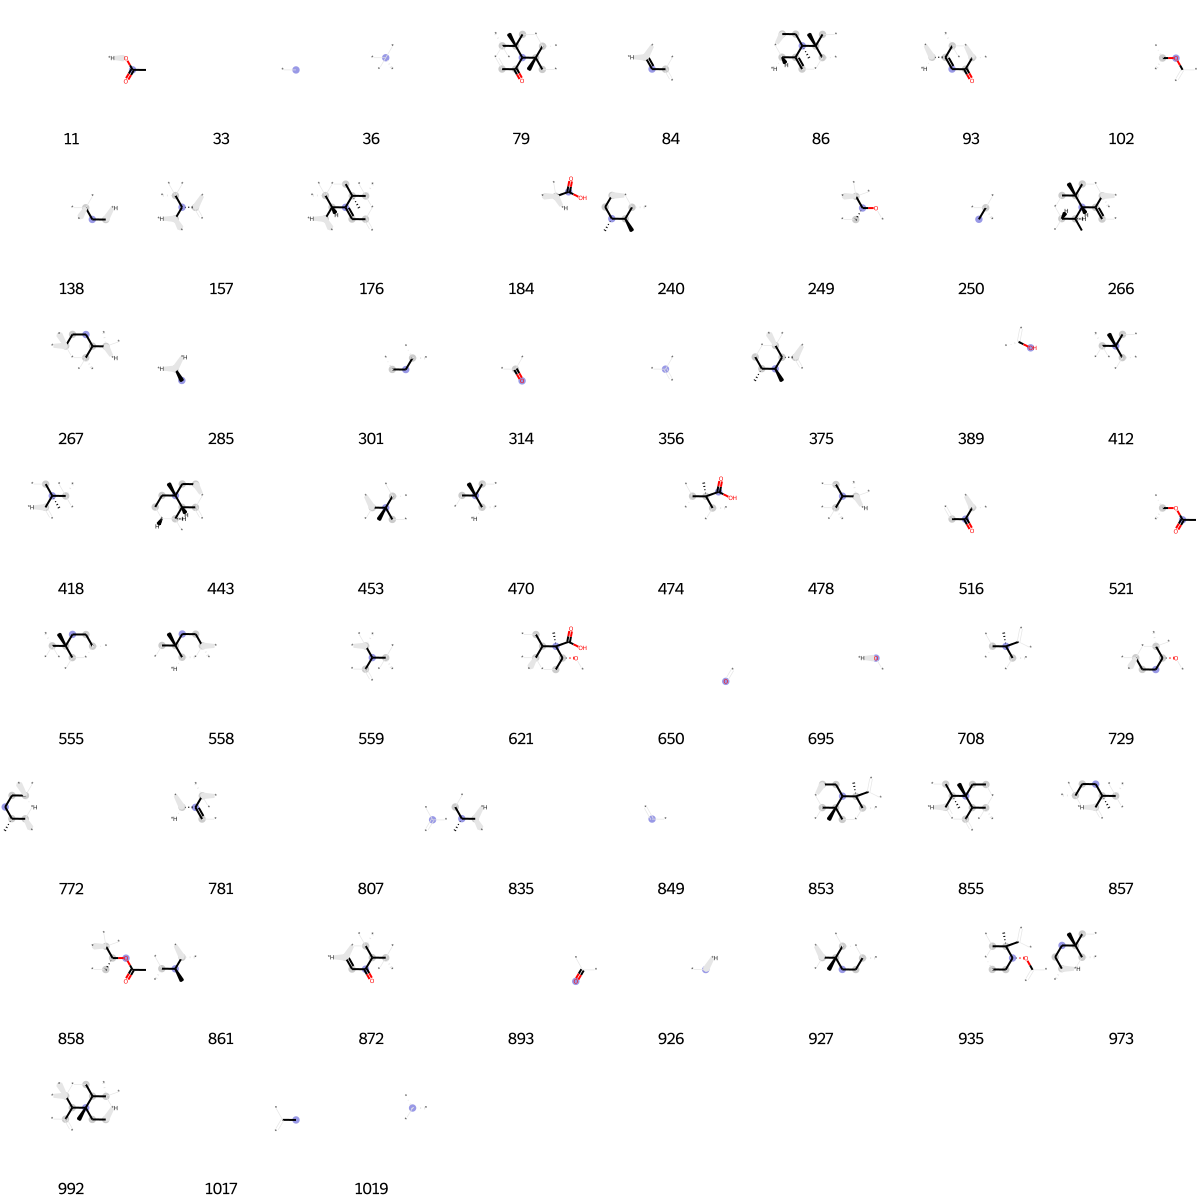

In [1516]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1517]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 3,
 4,
 15,
 33,
 41,
 52,
 64,
 69,
 80,
 94,
 104,
 106,
 108,
 128,
 140,
 192,
 193,
 197,
 219,
 221,
 232,
 236,
 237,
 242,
 249,
 251,
 282,
 294,
 301,
 310,
 320,
 322,
 333,
 341,
 354,
 356,
 388,
 428,
 449,
 456,
 467,
 477,
 488,
 512,
 520,
 531,
 534,
 557,
 562,
 573,
 575,
 597,
 650,
 667,
 695,
 726,
 730,
 737,
 739,
 803,
 807,
 841,
 849,
 863,
 868,
 875,
 890,
 893,
 926,
 935,
 946,
 974,
 980,
 1008,
 1019]

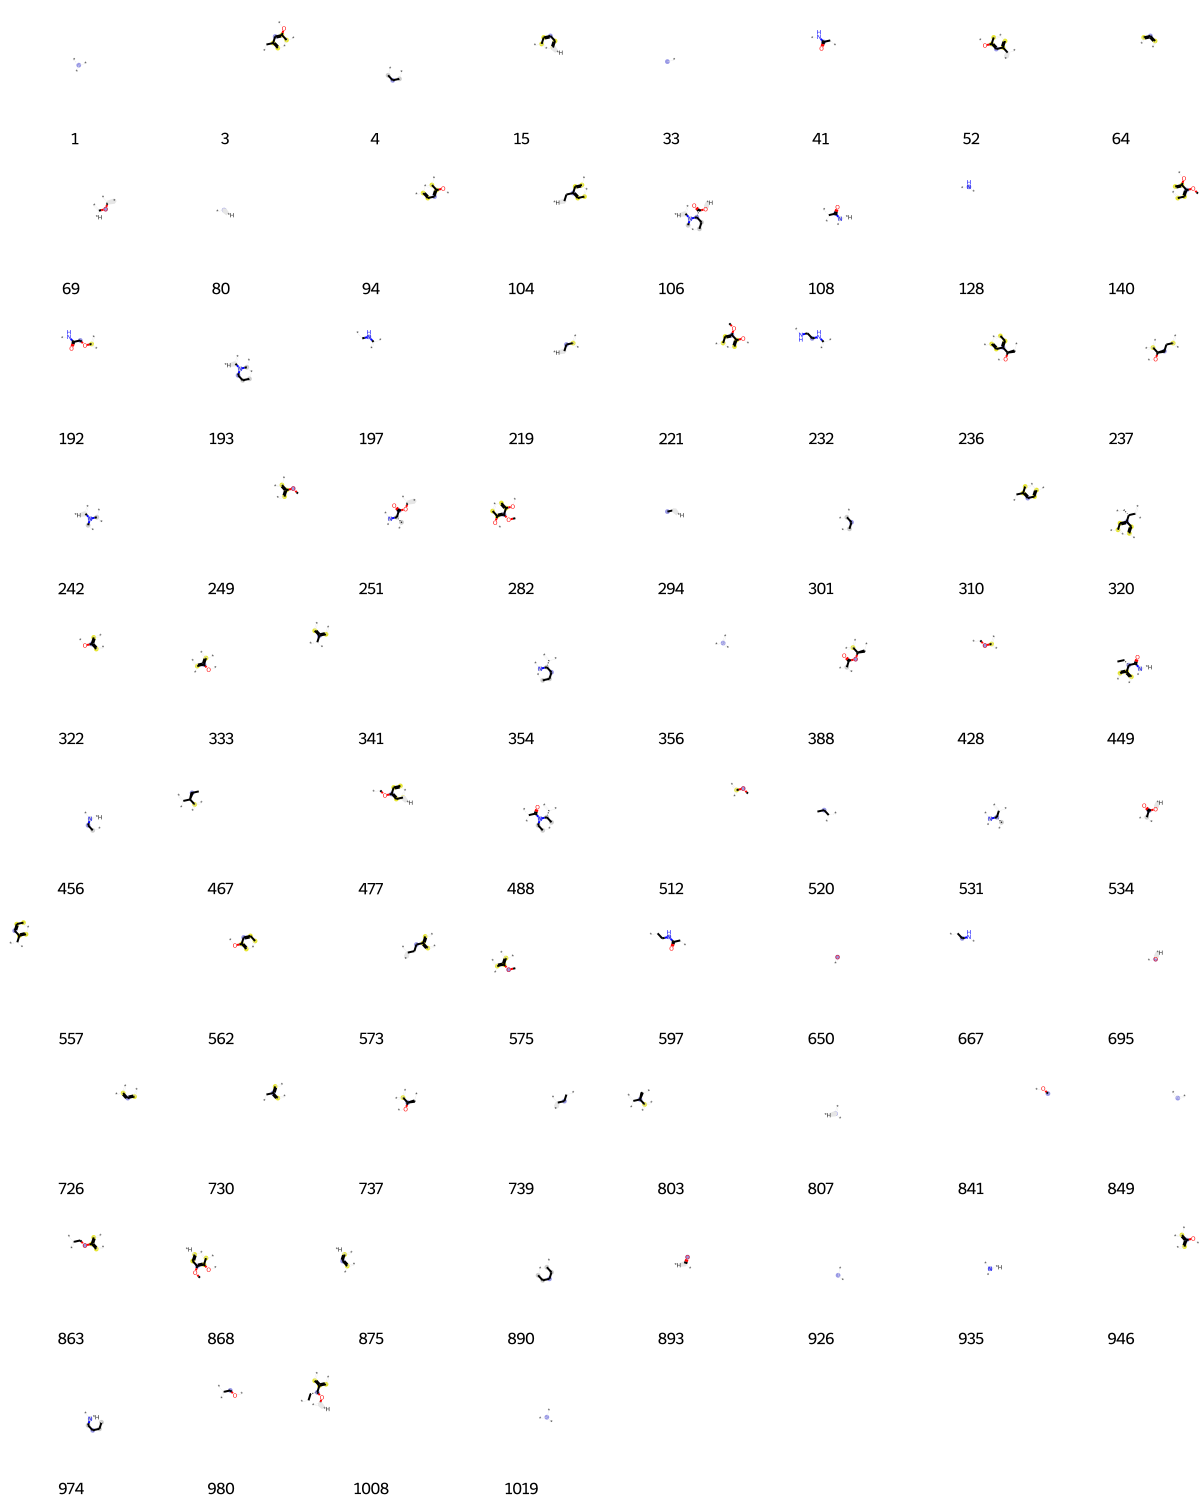

In [1518]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1519]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[47,
 101,
 140,
 147,
 309,
 356,
 378,
 428,
 456,
 511,
 552,
 562,
 579,
 650,
 768,
 807,
 842,
 849,
 855,
 893,
 970]

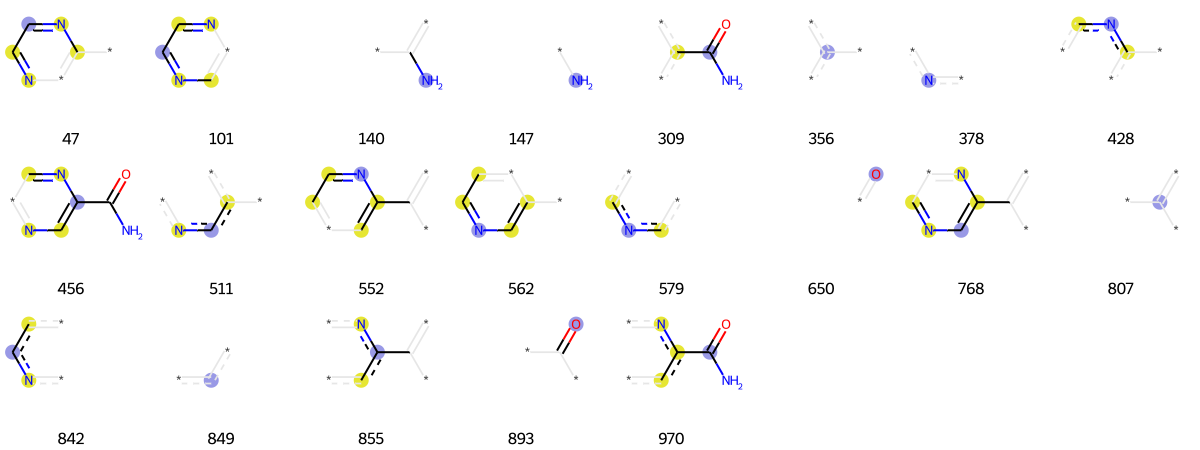

In [1520]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1521]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[33,
 64,
 80,
 90,
 119,
 128,
 175,
 197,
 219,
 220,
 245,
 325,
 328,
 333,
 356,
 364,
 476,
 549,
 583,
 650,
 667,
 726,
 731,
 759,
 806,
 807,
 828,
 849,
 855,
 893,
 913,
 984,
 1017]

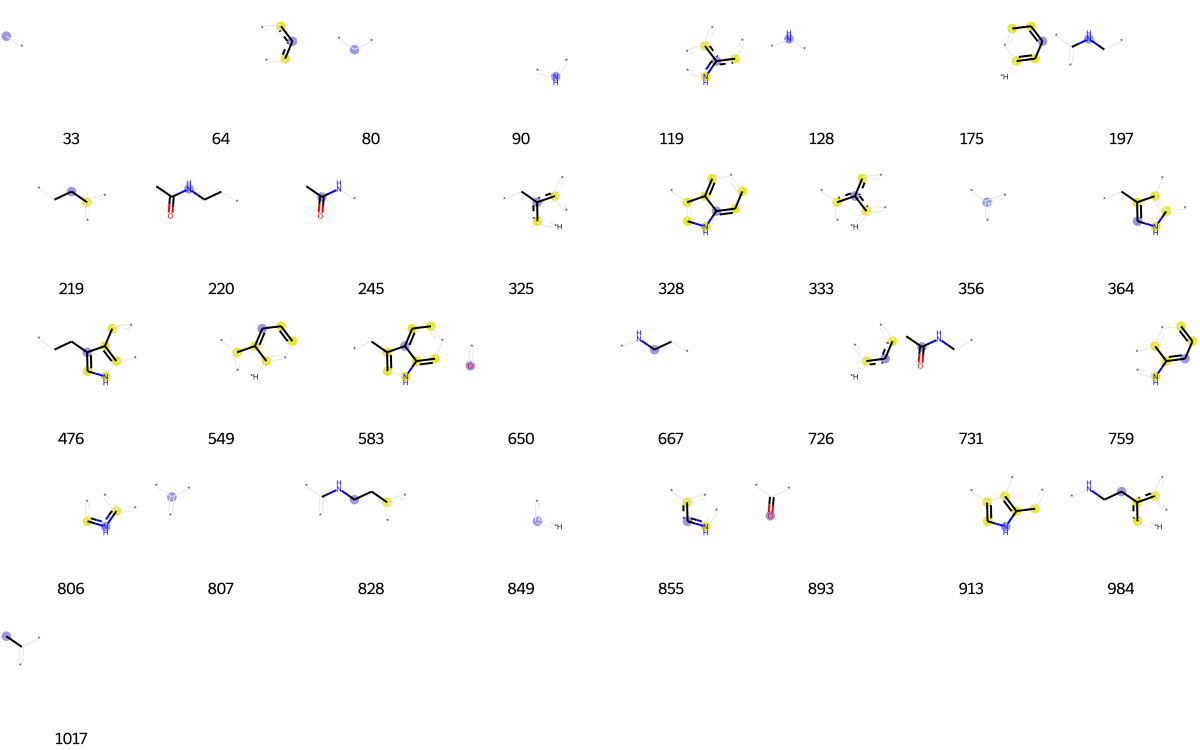

In [1522]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1523]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 74,
 80,
 121,
 175,
 219,
 302,
 316,
 341,
 356,
 389,
 430,
 456,
 458,
 514,
 533,
 557,
 653,
 695,
 726,
 730,
 741,
 767,
 819,
 849,
 887,
 908,
 926,
 935,
 978]

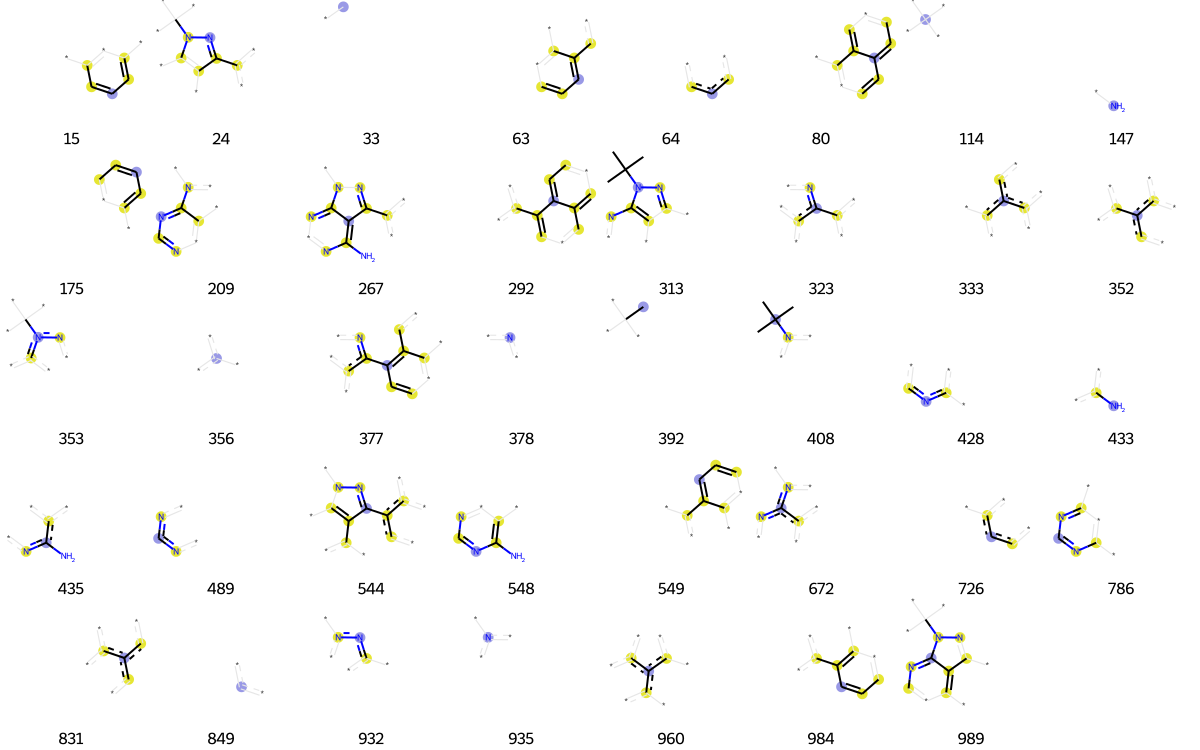

In [1524]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1525]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[36,
 64,
 74,
 80,
 90,
 121,
 122,
 130,
 175,
 212,
 218,
 219,
 299,
 314,
 325,
 333,
 356,
 366,
 378,
 393,
 407,
 448,
 453,
 456,
 458,
 461,
 473,
 478,
 484,
 514,
 540,
 549,
 551,
 561,
 584,
 622,
 624,
 650,
 653,
 659,
 675,
 680,
 726,
 767,
 790,
 802,
 810,
 849,
 875,
 885,
 926,
 935,
 940,
 958,
 965,
 968]

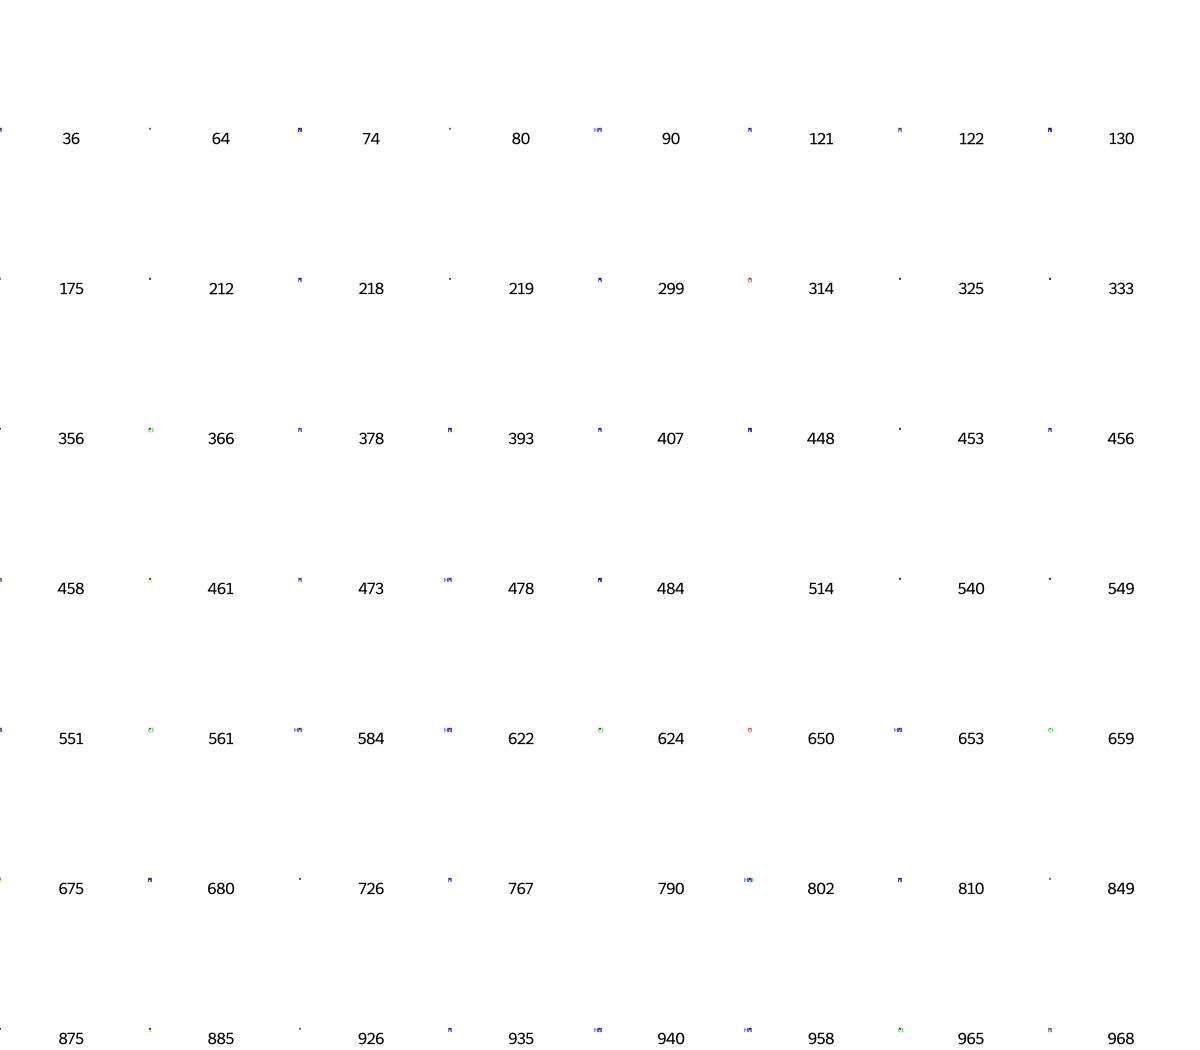

In [1526]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1527]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 64,
 77,
 80,
 114,
 118,
 121,
 140,
 147,
 175,
 284,
 319,
 356,
 378,
 387,
 389,
 393,
 428,
 431,
 432,
 479,
 548,
 586,
 601,
 602,
 633,
 650,
 698,
 726,
 807,
 842,
 849,
 893,
 914,
 917,
 935,
 993,
 1011]

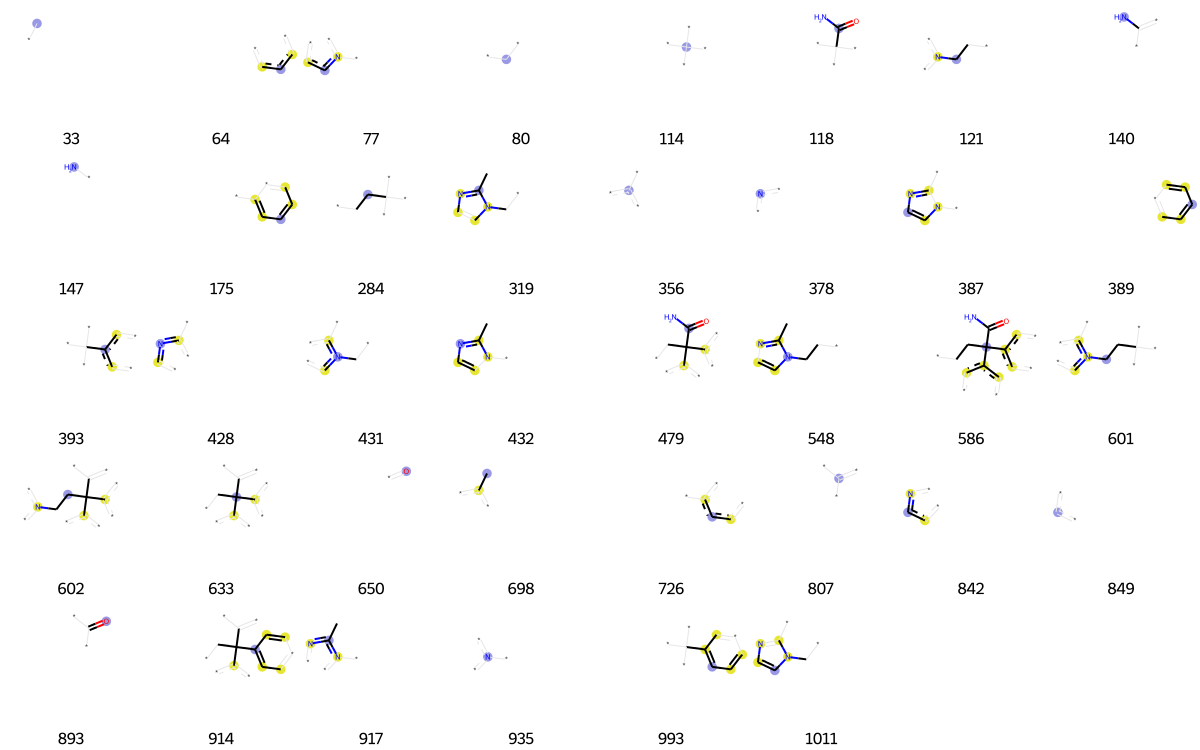

In [1528]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1529]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[8,
 43,
 64,
 75,
 77,
 114,
 175,
 232,
 246,
 254,
 356,
 366,
 368,
 378,
 389,
 393,
 419,
 561,
 635,
 645,
 659,
 688,
 726,
 787,
 842,
 849,
 915,
 935,
 974,
 993]

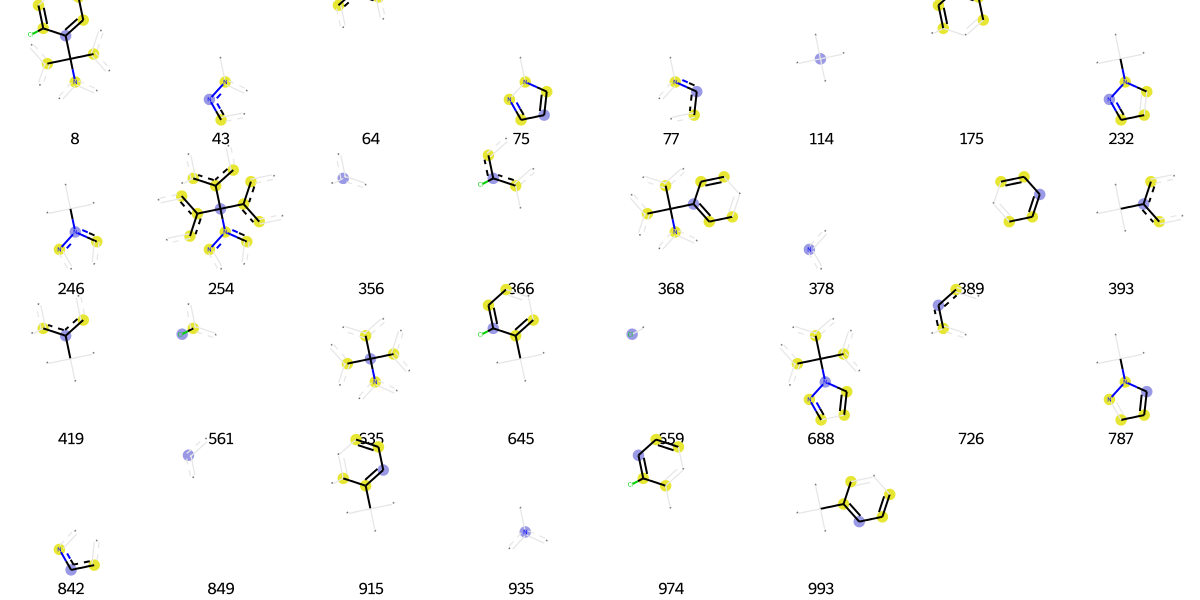

In [1530]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1531]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[7,
 8,
 10,
 36,
 38,
 64,
 77,
 80,
 90,
 106,
 128,
 136,
 142,
 175,
 187,
 200,
 314,
 328,
 352,
 356,
 378,
 387,
 389,
 410,
 446,
 547,
 573,
 576,
 650,
 672,
 699,
 724,
 726,
 736,
 792,
 807,
 808,
 816,
 849,
 862,
 869,
 893,
 904,
 958,
 965,
 984,
 1019]

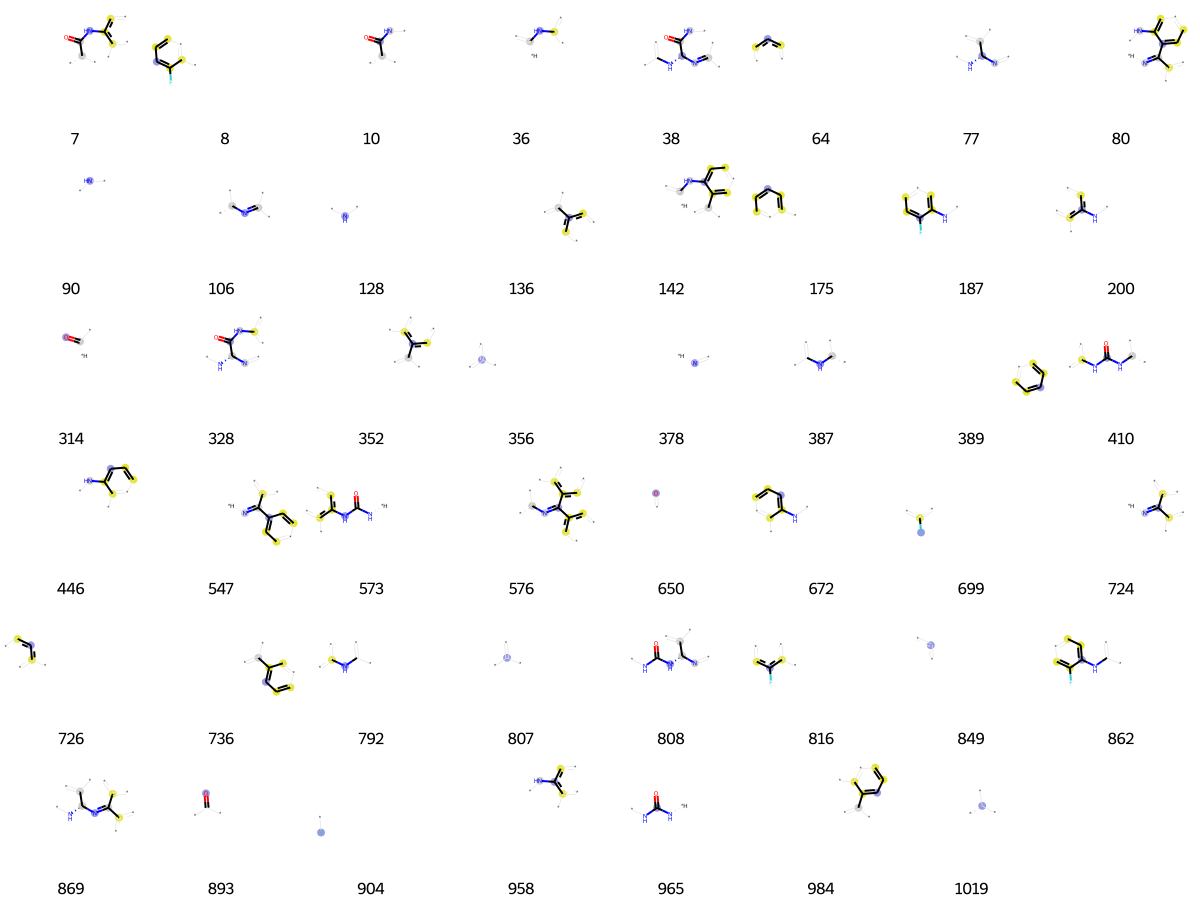

In [1532]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1533]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 15,
 33,
 52,
 64,
 175,
 193,
 228,
 233,
 283,
 322,
 341,
 346,
 356,
 389,
 557,
 562,
 593,
 650,
 695,
 726,
 807,
 820,
 849,
 875,
 893,
 900,
 921,
 997]

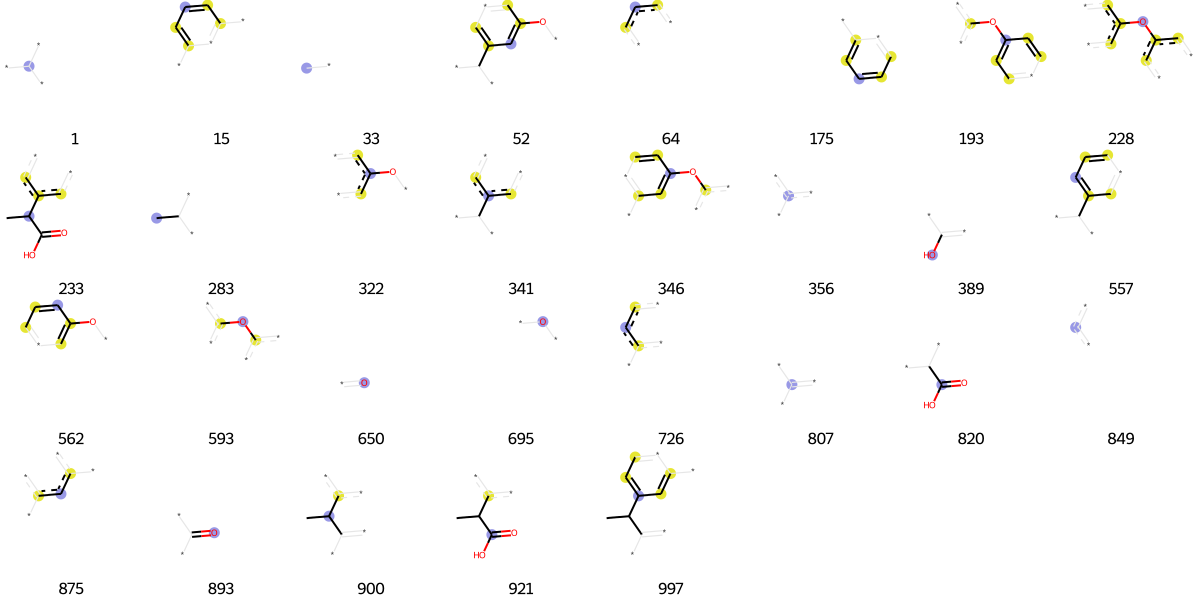

In [1534]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1535]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[88,
 133,
 136,
 145,
 202,
 209,
 222,
 237,
 256,
 289,
 304,
 314,
 333,
 352,
 356,
 384,
 451,
 525,
 578,
 583,
 650,
 656,
 690,
 709,
 726,
 745,
 754,
 807,
 849,
 888,
 896,
 952]

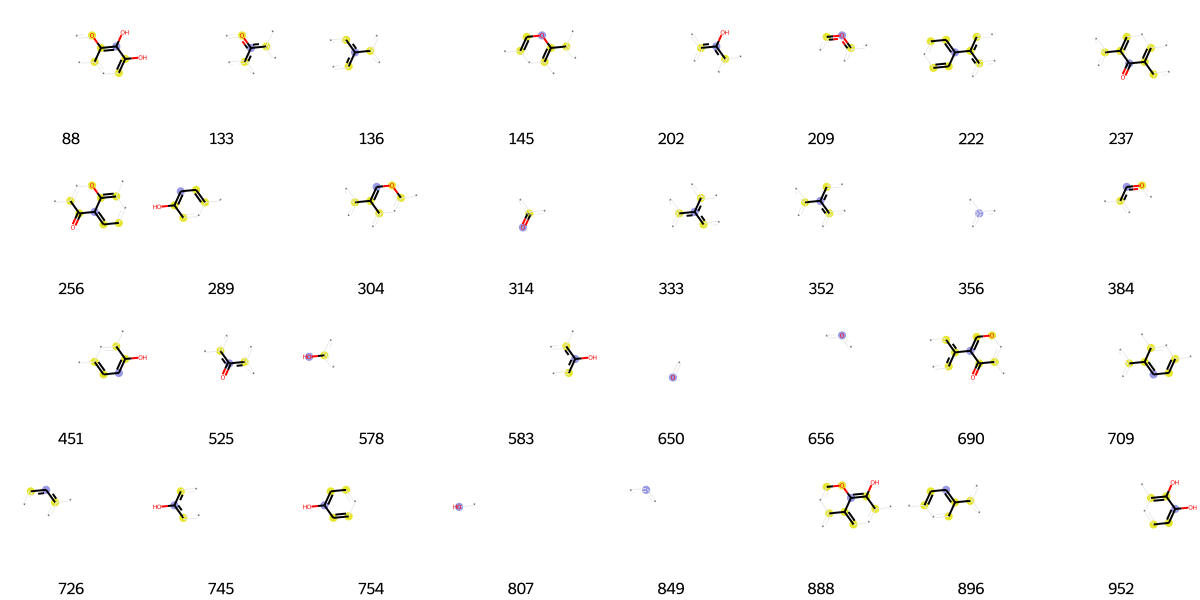

In [1536]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1537]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[15,
 25,
 33,
 43,
 48,
 64,
 68,
 80,
 81,
 105,
 114,
 121,
 128,
 197,
 236,
 252,
 255,
 258,
 267,
 276,
 293,
 307,
 314,
 319,
 350,
 352,
 356,
 378,
 393,
 413,
 421,
 428,
 429,
 444,
 452,
 486,
 498,
 504,
 511,
 515,
 643,
 650,
 656,
 668,
 675,
 692,
 698,
 715,
 724,
 726,
 742,
 801,
 807,
 809,
 813,
 829,
 838,
 842,
 849,
 875,
 893,
 904,
 935,
 967,
 969,
 970,
 982,
 993]

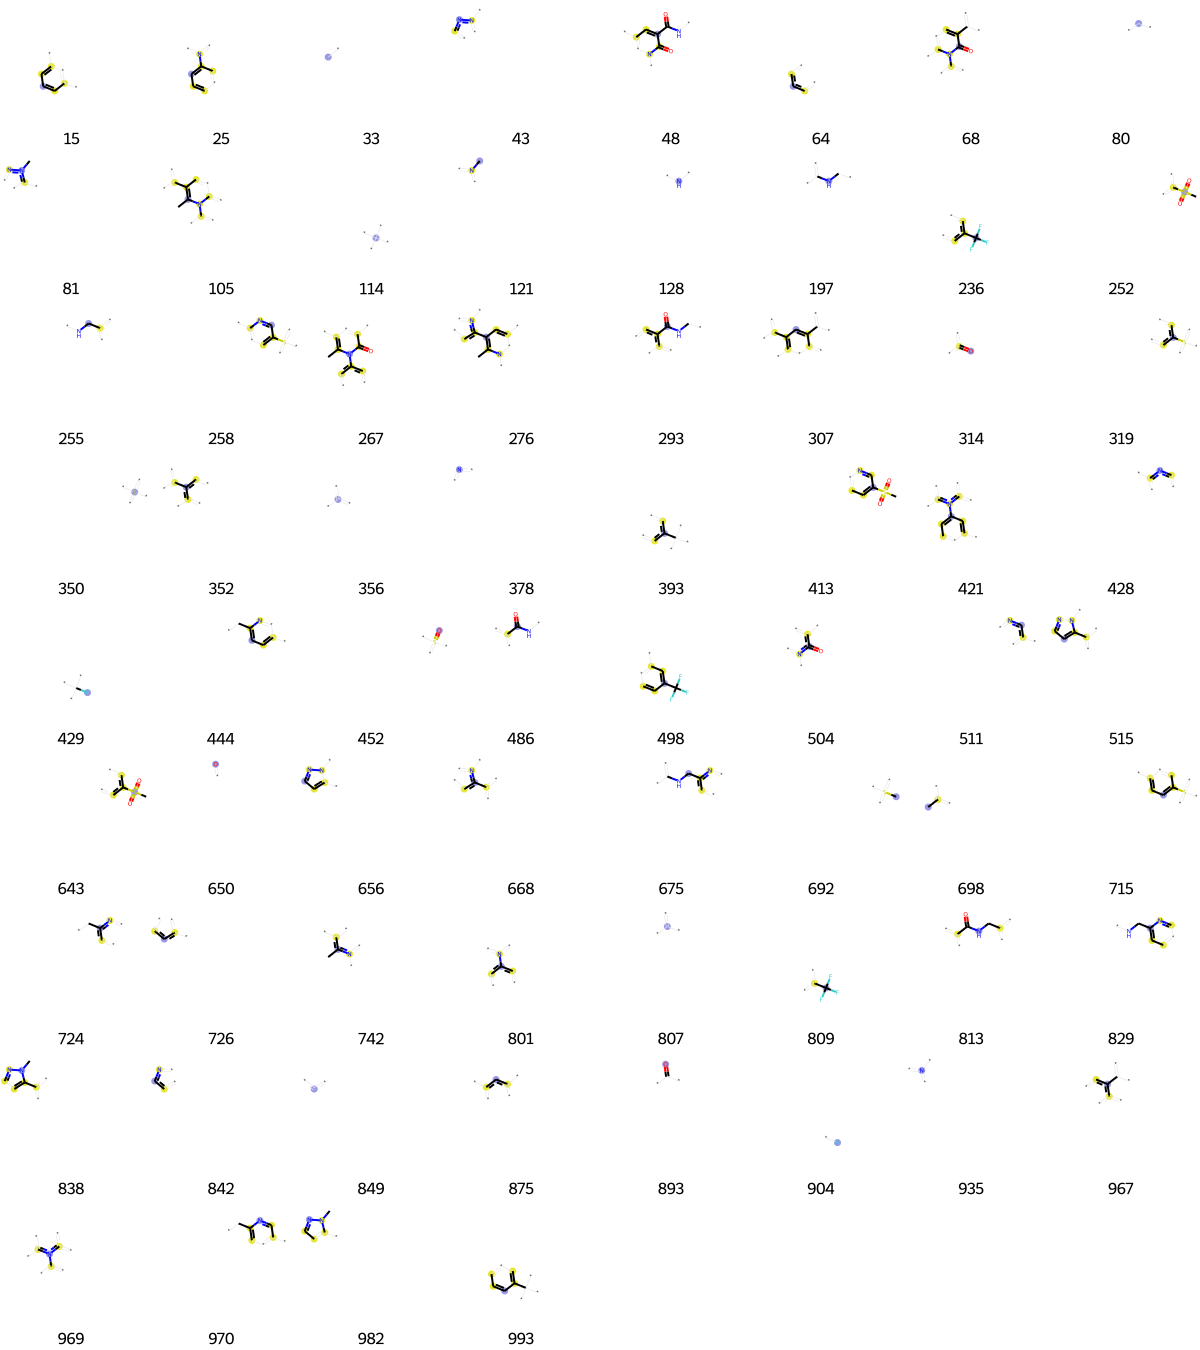

In [1538]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1539]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[24,
 171,
 192,
 250,
 301,
 322,
 356,
 432,
 486,
 489,
 650,
 695,
 715,
 718,
 726,
 753,
 769,
 785,
 790,
 807,
 814,
 838,
 849,
 939,
 980]

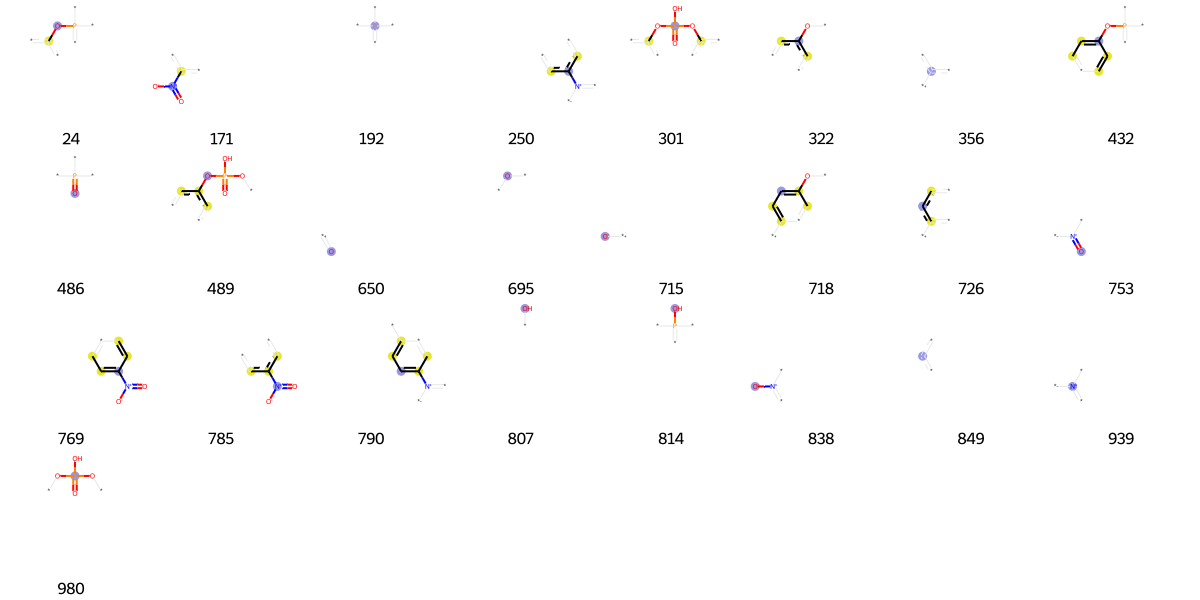

In [1540]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1541]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[15,
 64,
 75,
 130,
 314,
 352,
 356,
 400,
 447,
 544,
 547,
 578,
 583,
 650,
 723,
 726,
 747,
 807,
 849,
 963,
 984]

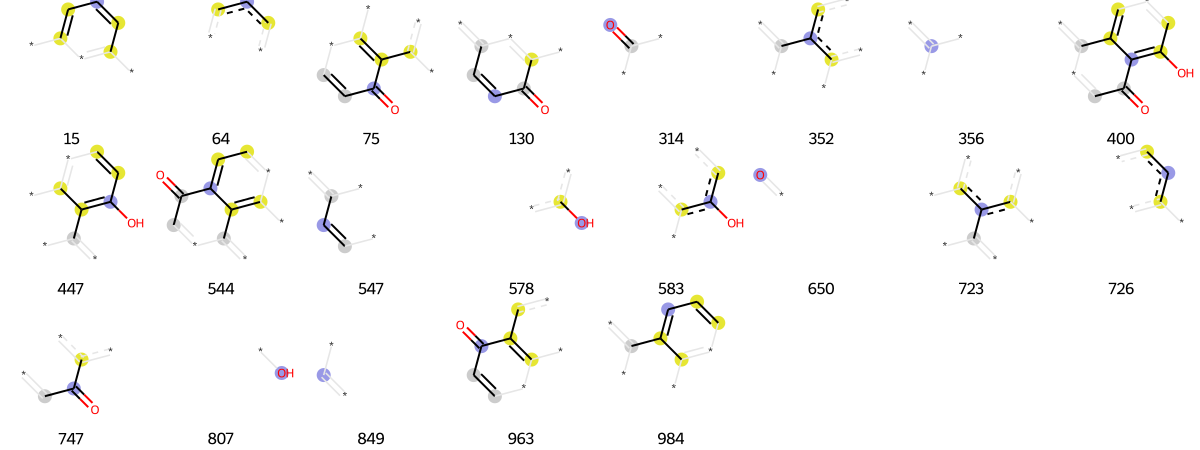

In [1542]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1543]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 11,
 41,
 69,
 72,
 73,
 114,
 135,
 136,
 294,
 301,
 325,
 347,
 356,
 393,
 413,
 429,
 441,
 456,
 496,
 576,
 586,
 623,
 641,
 650,
 652,
 656,
 695,
 726,
 738,
 741,
 776,
 807,
 808,
 839,
 849,
 875,
 881,
 884,
 893,
 904,
 925,
 926,
 929,
 935,
 985,
 1019]

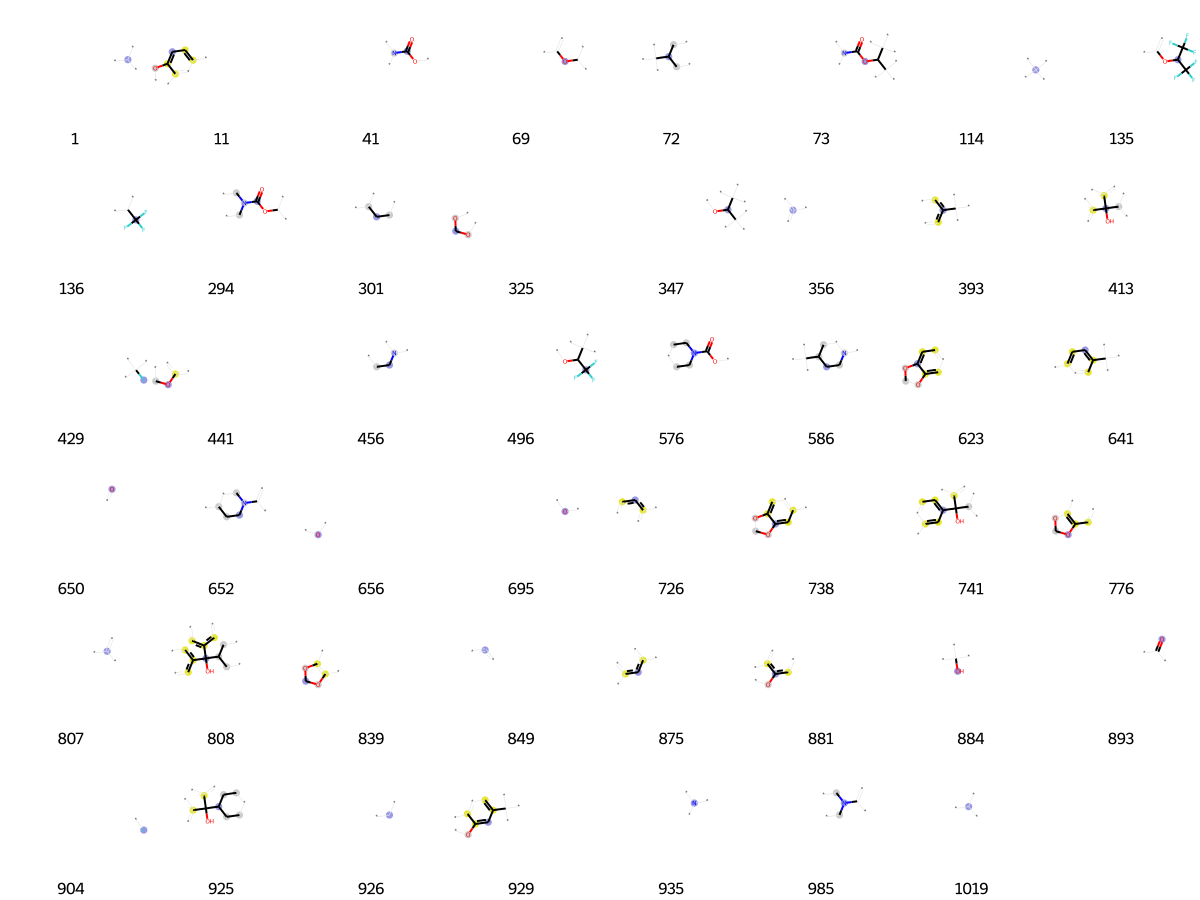

In [1544]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1545]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[13,
 33,
 51,
 80,
 119,
 192,
 225,
 294,
 295,
 328,
 420,
 486,
 591,
 650,
 692,
 695,
 794,
 795,
 807,
 814,
 887]

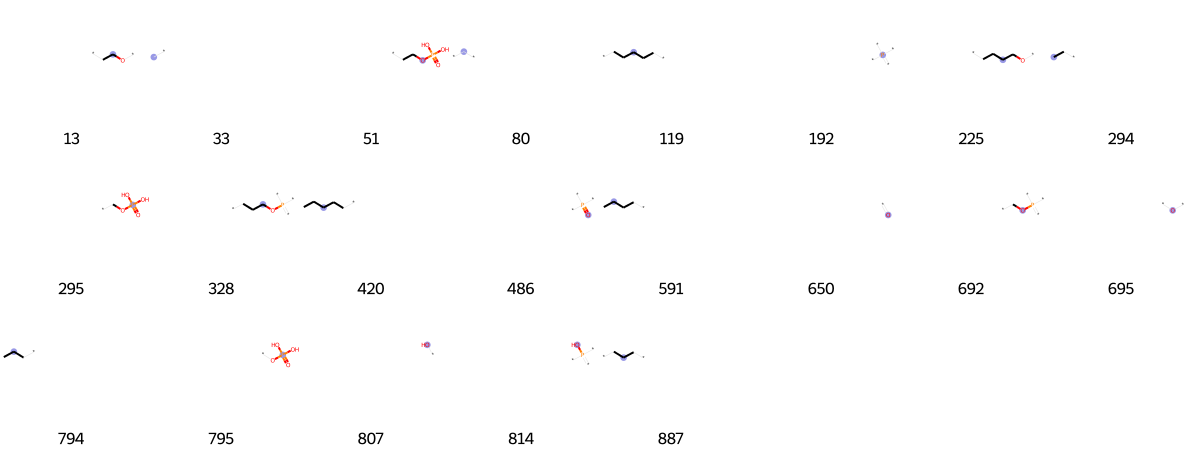

In [1546]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])